## Utilities

In [ ]:
# pip install corner
# pip install tables
# pip install h5py


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner 

from data.dataLoader import h5_data_loader
from PCAutil.utilities import loading_matrix, biplot


#Some colors that Pablo likes:
colors = [
    "#ff7f0e",

    "#1f77b4",

    "#2ca02c",
    "#d62728",
    
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
] 

markers = [
    "o",  # Circle
    "^",  # Triangle up
    "s",  # Square
    "P",  # Plus (filled)
    "*",  # Star
    "X",  # X (filled)
    "D",  # Diamond
    "H",  # Hexagon
]




#Number used for when dividing training and testing randomly uniformly (interpolating)
TestingFraction=0.34

#Number used for when dividing training and testing by how close they are to the stable nuclei
distance=2



#Target nucleus: 
target_isotope=np.array([32,20])


#Coordinates to truncate so the LDM evaluations are not done below these isotopes
minimumZ=8
minimumN=8



centering_data=False
stable_coordinates_full=np.loadtxt("Stable-Isotopes.txt")

In [64]:
models = ['AME2020', 'ME2', 'MEdelta', 'PC1', 'NL3S', 'SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', \
        'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']

models_data_sets={}
# models_data_sets=[]

for model in models:
        Data_values=pd.read_hdf("./data/selected_data.h5", key = model, mode = 'r')
        # models_data_sets[model]= {'N': Data_values['N'] , 'Z': Data_values['Z'], 'BE': Data_values['BE']}
        # models_data_sets.append(Data_values[['N','Z','BE']])
        models_data_sets[model] = Data_values[['N','Z','BE']]
        
    



In [70]:
models_data_sets['AME2020']['N']

0         1
1         2
2         3
3         4
4         5
       ... 
2543    157
2544    158
2545    157
2546    159
2547    160
Name: N, Length: 2548, dtype: int64

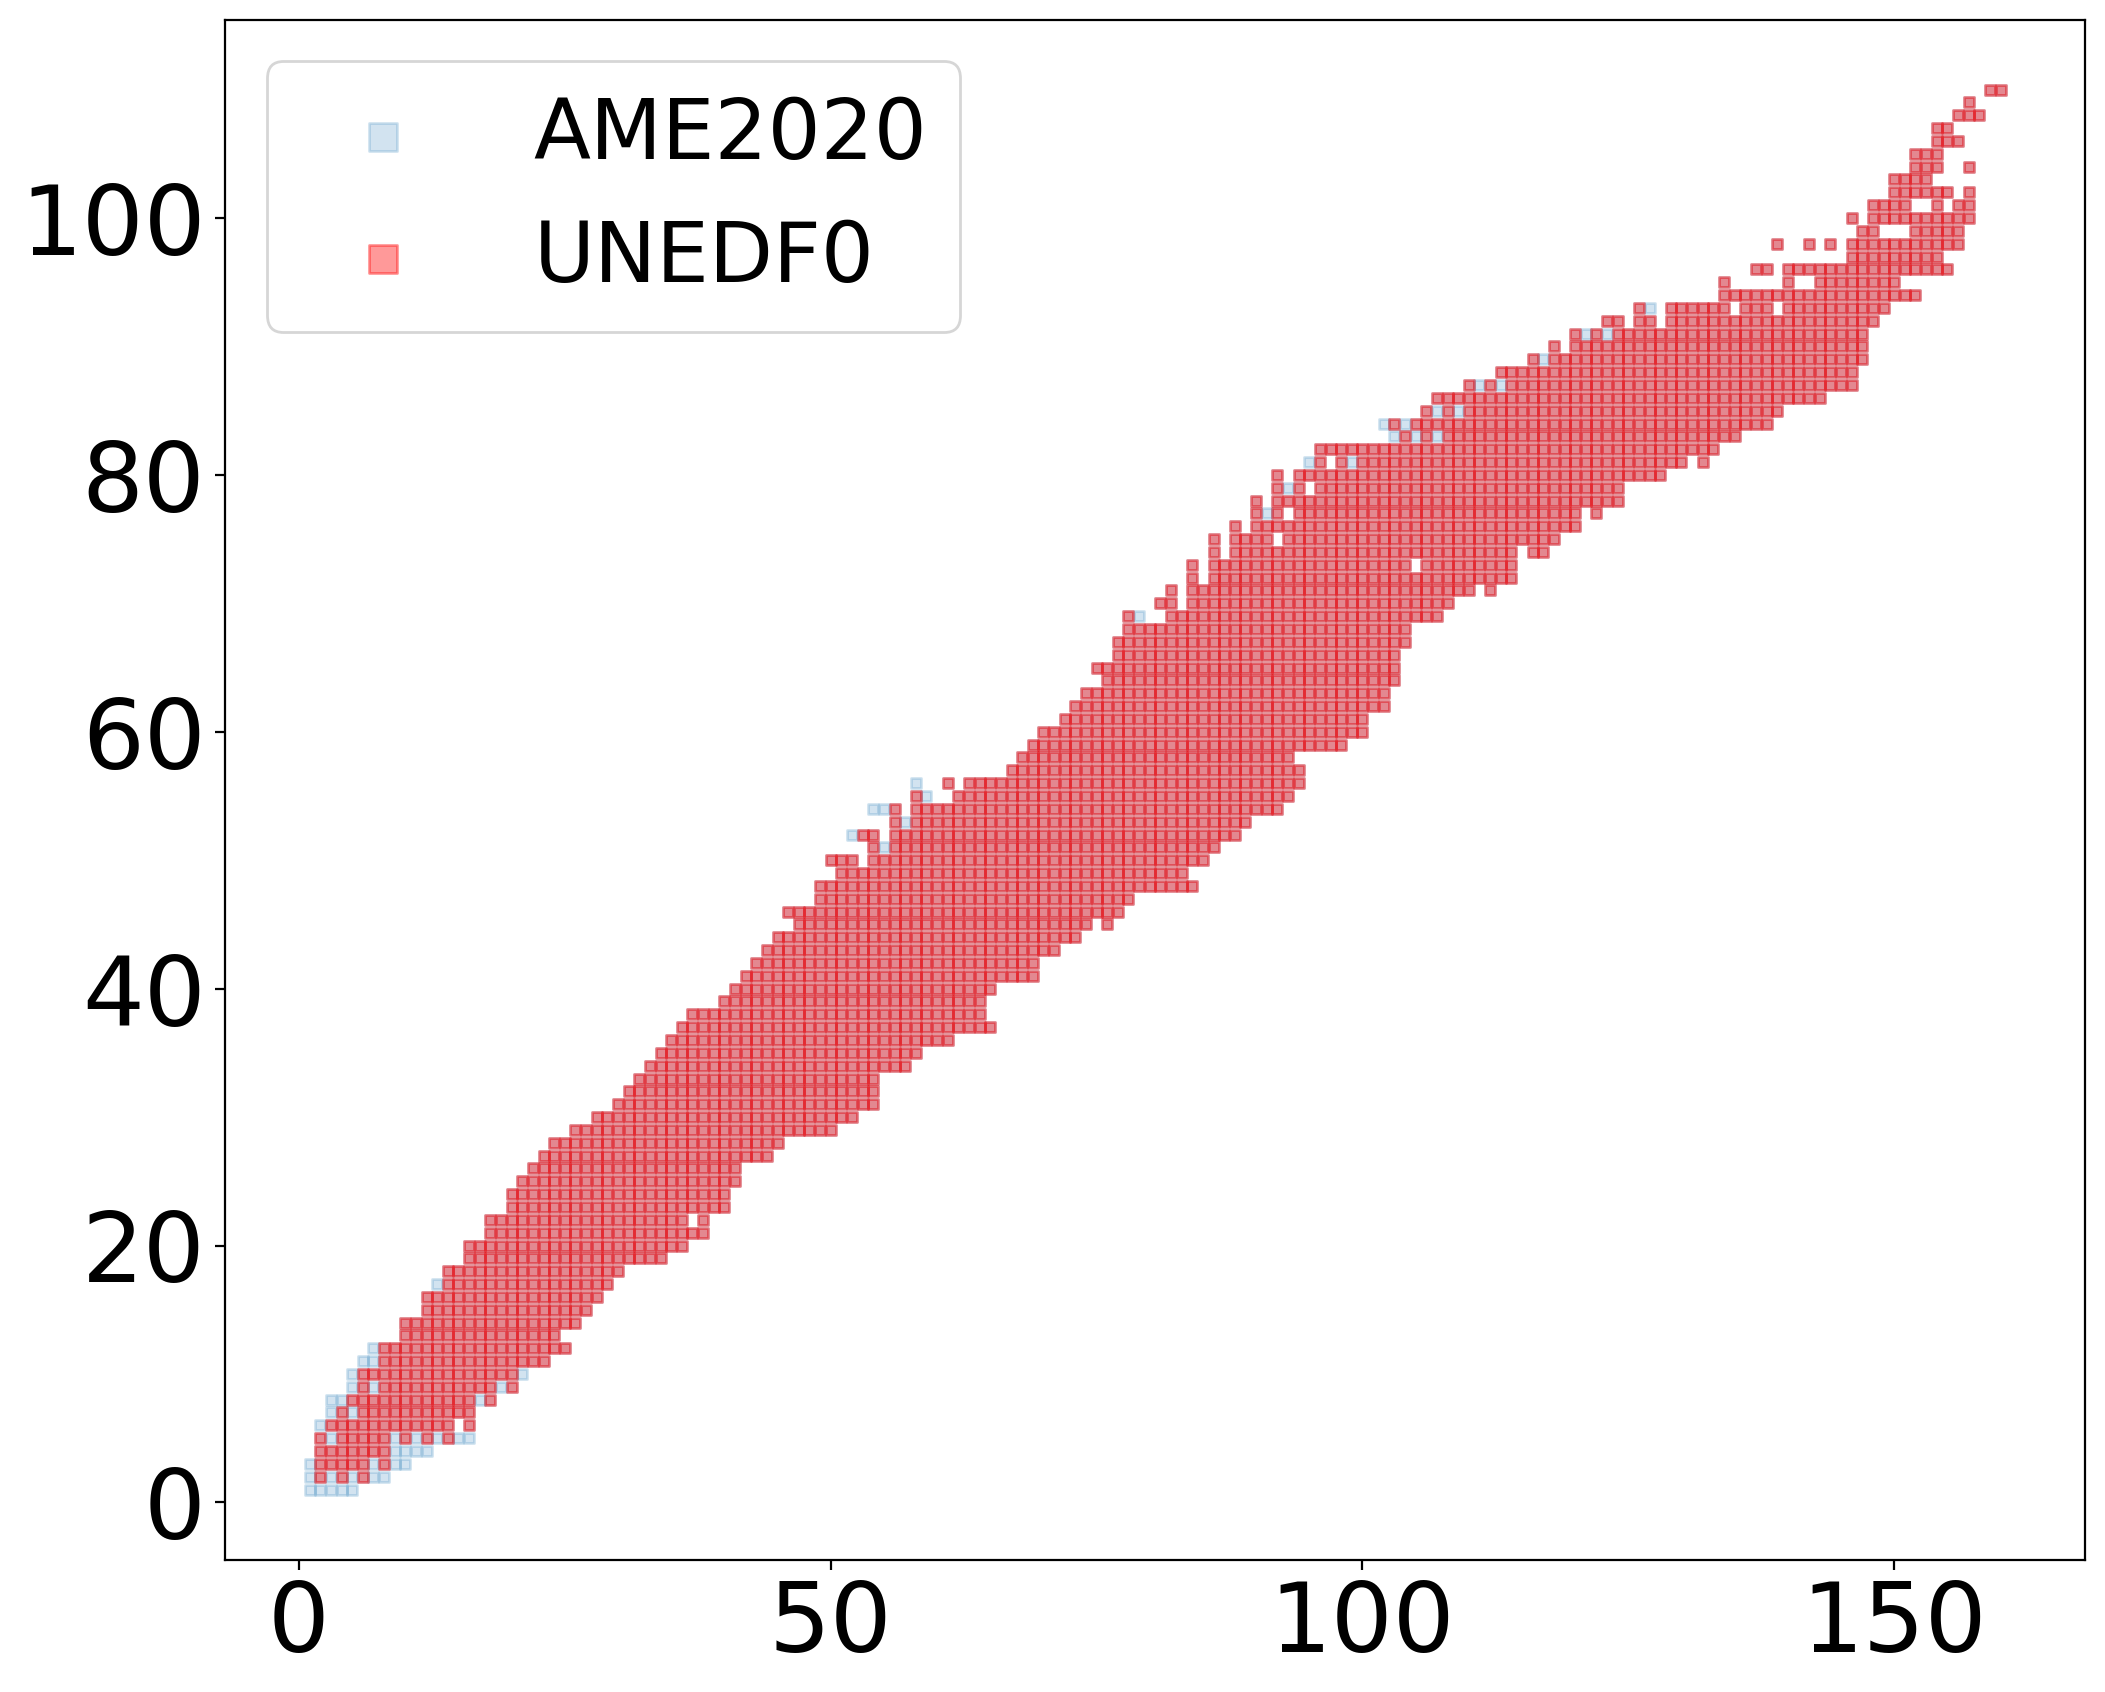

In [88]:
plt.rc("xtick", labelsize=35)
plt.rc("ytick", labelsize=35)

fig, ax = plt.subplots(figsize=(12,10), dpi=200)

ax.scatter(x = models_data_sets['AME2020']['N'], y = models_data_sets['AME2020']['Z'], label = "AME2020", alpha = 0.2,s=11,marker="s")

model=models[9]
ax.scatter(x = models_data_sets[model]['N'], y = models_data_sets[model]['Z'], label = model, alpha = 0.4,s=11,marker="s",color='r')




# ax.scatter(x = stable_coordinates_full.T[0], y = stable_coordinates_full.T[1], label = "Stable", alpha = 0.8,color='black',s=11,marker="s")







# plt.ylabel("Protons",fontsize=45)
plt.legend(fontsize=30,markerscale=3)
plt.show()

In [49]:
Data_values=pd.read_hdf("./data/selected_data.h5", key = 'UNEDF0', mode = 'r')

In [51]:
Data_values['Z']

0         2
1         2
2         2
3         3
4         3
       ... 
2479    108
2480    108
2481    109
2482    110
2483    110
Name: Z, Length: 2484, dtype: int64

In [54]:
models_data_sets['AME2020']['Z']

0         1
1         1
2         1
3         1
4         1
       ... 
2543    108
2544    108
2545    109
2546    110
2547    110
Name: Z, Length: 2548, dtype: int64

In [37]:
AME=pd.read_hdf("./data/selected_data.h5", key = 'AME2020', mode = 'r')

In [39]:
BCPM=pd.read_hdf("./data/selected_data.h5", key = 'BCPM', mode = 'r')

In [38]:
AME['BE']

0          2.224566
1          8.481796
2          6.881796
3          6.681796
4          5.769837
           ...     
2543    1933.505561
2544    1941.337453
2545    1934.022107
2546    1950.291722
2547    1958.516118
Name: BE, Length: 2548, dtype: float64

In [41]:
BCPM['BE']

0         28.289382
1         38.598647
2         50.264745
3         56.656400
4         65.953411
           ...     
2520    1929.496935
2521    1937.508145
2522    1929.987755
2523    1946.396044
2524    1954.589454
Name: BE, Length: 2525, dtype: float64

In [13]:
import h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.2 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
file_path = "./data/selected_data.h5"

with h5py.File(file_path, 'r') as file:
    def printname(name):
        print(name)
    file.visit(printname)

AME2020
AME2020/axis0
AME2020/axis1
AME2020/block0_items
AME2020/block0_values
AME2020/block1_items
AME2020/block1_values
AME2020/block2_items
AME2020/block2_values
BCPM
BCPM/axis0
BCPM/axis1
BCPM/block0_items
BCPM/block0_values
BCPM/block1_items
BCPM/block1_values
D1M
D1M/axis0
D1M/axis1
D1M/block0_items
D1M/block0_values
D1M/block1_items
D1M/block1_values
FRDM12
FRDM12/axis0
FRDM12/axis1
FRDM12/block0_items
FRDM12/block0_values
FRDM12/block1_items
FRDM12/block1_values
HFB24
HFB24/axis0
HFB24/axis1
HFB24/block0_items
HFB24/block0_values
HFB24/block1_items
HFB24/block1_values
ME2
ME2/axis0
ME2/axis1
ME2/block0_items
ME2/block0_values
ME2/block1_items
ME2/block1_values
MEdelta
MEdelta/axis0
MEdelta/axis1
MEdelta/block0_items
MEdelta/block0_values
MEdelta/block1_items
MEdelta/block1_values
NL3S
NL3S/axis0
NL3S/axis1
NL3S/block0_items
NL3S/block0_values
NL3S/block1_items
NL3S/block1_values
PC1
PC1/axis0
PC1/axis1
PC1/block0_items
PC1/block0_values
PC1/block1_items
PC1/block1_values
SKMS
S

In [2]:
#Some functions for plotting capabilities

def plot_bars(values, labels, title="Bar Plot", color='blue'):
    """
    Create a bar plot based on the provided values and labels.

    Parameters:
    - values (list): A list of numerical values for the bars.
    - labels (list): A list of labels for each bar.
    - title (str): The title for the bar plot. Default is "Bar Plot".
    - color (str): Color for the bars. Default is 'blue'.
    """
    
    if len(values) != len(labels):
        raise ValueError("Length of values and labels should be the same.")
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color=color)
    plt.title(title)
    plt.xlabel('Models')
    plt.ylabel('Vt Coordinates')
    plt.xticks(labels,fontsize=10,rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


def Plotter2D_single(data):
    xvals,yvals,zvals = data
    #A plotter to see principal components in 2D
    plt.rc("xtick", labelsize=25)
    plt.rc("ytick", labelsize=25)
    
    fig, ax = plt.subplots(figsize=(12, 8), dpi=200)

    # Create scatter plot
    sc = ax.scatter(xvals, yvals, c=zvals, s=25, cmap='plasma',marker='s')
    # plt.colorbar(sc, label='Z-Value')
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Z-Value', fontsize=25) 
    cbar.ax.tick_params(labelsize=20) 
    plt.xlabel('Neutrons',fontsize=25)
    plt.ylabel('Protons',fontsize=25)

    ax.grid(True)
    # ax.axis('equal')

    plt.show()

def Plotter3D_single(data,elev=30,azim=-60):
    xvals,yvals,zvals = data
    #A plotter to see principal components in 3D
    plt.rc("xtick", labelsize=15)
    plt.rc("ytick", labelsize=15)

    z_min = zvals.min()
    z_max = zvals.max()
    z_normalized = (zvals - z_min) / (z_max - z_min)

    # Create figure for 3D plot
    fig = plt.figure(figsize=(8, 6), dpi=200)
    ax = fig.add_subplot(111, projection='3d')



    # Define the size of the bars
    dx = dy = 1.5  # Width of the bars in the x and y direction
    dz = z_normalized        # Height of the bars (z values)

    # Create 3D bar plot
    ax.bar3d(xvals, yvals, np.zeros_like(zvals), dx, dy, dz, color=plt.cm.plasma(z_normalized))

    ax.view_init(elev=elev, azim=azim) 

    # Setting labels and title
    ax.set_xlabel('Neutrons')
    ax.set_ylabel('Protons')
    ax.set_zlabel('Scaled Z')


    plt.show()    



def Plotter2D(ax,xvals,yvals,zvals):
    #A plotter to see principal components in 2D, part of the big plotter



    # Create scatter plot
    sc = ax.scatter(xvals, yvals, c=zvals, s=25, cmap='plasma',marker='s')
    # plt.colorbar(sc, label='Z-Value')
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Z-Value', fontsize=25) 
    cbar.ax.tick_params(labelsize=20) 




    plt.xlabel('Neutrons',fontsize=25)
    plt.ylabel('Protons',fontsize=25)

    ax.grid(True)
    ax.axis('equal')

    # plt.show()

def Plotter3D(ax,xvals,yvals,zvals,elev=30,azim=-60):
    #A plotter to see principal components in 3D, part of the big plotter


    z_min = zvals.min()
    z_max = zvals.max()
    z_normalized = (zvals - z_min) / (z_max - z_min)

    # Create figure for 3D plot
    # fig = plt.figure(figsize=(8, 6), dpi=200)
    # ax = fig.add_subplot(111, projection='3d')



    # Define the size of the bars
    dx = dy = 1.5  # Width of the bars in the x and y direction
    dz = z_normalized        # Height of the bars (z values)

    # Create 3D bar plot
    ax.bar3d(xvals, yvals, np.zeros_like(zvals), dx, dy, dz, color=plt.cm.plasma(z_normalized))

    ax.view_init(elev=elev, azim=azim) 

    # Setting labels and title
    ax.set_xlabel('Neutrons')
    ax.set_ylabel('Protons')
    ax.set_zlabel('Scaled Z')


    # plt.show()    



def PlotMultiple(data_sets,angles_sheet=None):
    # Determine the number of rows needed for the plots
    n_rows = len(data_sets)
    # Each data_sets element should look like [x,y,z]

    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 8 * n_rows), dpi=200)

    for i, (xvals, yvals, zvals) in enumerate(data_sets):
        # 2D plot
        ax_2d = fig.add_subplot(n_rows, 2, 2 * i + 1)
        Plotter2D(ax_2d, xvals, yvals, zvals)

        # 3D plot
        ax_3d = fig.add_subplot(n_rows, 2, 2 * i + 2, projection='3d')
        if angles_sheet == None:
            Plotter3D(ax_3d, xvals, yvals, zvals)
        else:
            Plotter3D(ax_3d, xvals, yvals, zvals,elev=angles_sheet[0],azim=angles_sheet[1])

    plt.tight_layout()
    plt.show()



In [3]:
def separate_points_random(list1,random_chance):
    """
    Separates points in list1 into two groups randomly

    """
    train = []
    test = []

    train_list_coordinates=[]
    test_list_coordinates=[]


    for i in range(len(list1)):
        point1=list1[i]
        val=np.random.rand()
        if val<=random_chance:
            train.append(point1)
            train_list_coordinates.append(i)
        else:
            test.append(point1)
            test_list_coordinates.append(i)

    return np.array(train), np.array(test), np.array(train_list_coordinates), np.array(test_list_coordinates)


In [4]:
def separate_points_distance(list1, list2, distance):
    """
    Separates points in list1 into two groups based on their proximity to any point in list2.

    :param list1: List of (x, y) tuples.
    :param list2: List of (x, y) tuples.
    :param distance: The threshold distance to determine proximity.
    :return: Two lists - close_points and distant_points.
    """
    train = []
    test = []

    train_list_coordinates=[]
    test_list_coordinates=[]

    for i in range(len(list1)):
        point1=list1[i]
        close = False
        for point2 in list2:
            if np.linalg.norm(np.array(point1) - np.array(point2)) <= distance:
                close = True
                break
        if close:
            train.append(point1)
            train_list_coordinates.append(i)
        else:
            test.append(point1)
            test_list_coordinates.append(i)

    return np.array(train), np.array(test), np.array(train_list_coordinates), np.array(test_list_coordinates)


In [5]:
def separate_points_distance_allSets(list1, list2, distance1, distance2):
    """
    Separates points in list1 into three groups based on their proximity to any point in list2.

    :param list1: List of (x, y) tuples.
    :param list2: List of (x, y) tuples.
    :param distance: The threshold distance to determine proximity.
    :return: Two lists - close_points and distant_points.
    """
    train = []
    validation=[]
    test = []

    train_list_coordinates=[]
    validation_list_coordinates=[]
    test_list_coordinates=[]

    for i in range(len(list1)):
        point1=list1[i]
        close = False
        for point2 in list2:
            if np.linalg.norm(np.array(point1) - np.array(point2)) <= distance1:
                close = True
                break
        if close:
            train.append(point1)
            train_list_coordinates.append(i)
        else:
            close2=False
            for point2 in list2:
                if np.linalg.norm(np.array(point1) - np.array(point2)) <= distance2:
                    close2 = True
                    break
            if close2==True:
                validation.append(point1)
                validation_list_coordinates.append(i)
            else:
                test.append(point1)
                test_list_coordinates.append(i)                

    return np.array(train),np.array(validation), np.array(test), np.array(train_list_coordinates),  np.array(validation_list_coordinates),np.array(test_list_coordinates)


In [25]:
stable_coordinates=[]

for i in range(len(stable_coordinates_full)):
    if (stable_coordinates_full[i][0]>=minimumN) & (stable_coordinates_full[i][1]>=minimumZ) & (stable_coordinates_full[i][0]% 2 == 0) & (stable_coordinates_full[i][1]% 2 == 0) :
        stable_coordinates.append(stable_coordinates_full[i])

stable_coordinates=np.array(stable_coordinates)

In [21]:
from data.dataLoader import h5_data_loader

In [22]:
models = ['SKMS', 'SKP', 'SLY4', 'SV', 'UNEDF0', 'UNEDF1', 'UNEDF2', 'FRDM12', 'HFB24', 'BCPM', 'D1M']
observable = "BE"
BE_data = h5_data_loader(models, observable, residuals = True, ZNCoordinates='AME2020.txt')

model_summary = {}
model_summary["res_mean"] = BE_data[models].mean(axis = 0).values
model_summary["res_std"] = BE_data[models].std(axis = 0).values
model_summary["rmse"] = np.sqrt(np.mean(BE_data[models] ** 2, axis = 0)).values

model_summary_df = pd.DataFrame(model_summary, index =BE_data[models].columns )
print(model_summary_df)
#print(model_summary_df.style.to_latex())

TypeError: h5_data_loader() got an unexpected keyword argument 'ZNCoordinates'

In [16]:
ZNNN = pd.read_csv('./data/AME2020.txt', delim_whitespace=True)

In [18]:
ZNNN['N']

0         1
1         0
2         1
3         2
4         3
       ... 
2545    157
2546    158
2547    157
2548    159
2549    160
Name: N, Length: 2550, dtype: int64

In [8]:
BE_data

exp       SKMS       SKP       SLY4        SV    UNEDF0    UNEDF1  \
0    260.799127 -10.335169 -4.834917  -3.746300 -1.838488 -2.807645  4.988255   
1    246.400285  -5.714456 -4.298928  -4.174770 -1.614442 -4.160153  1.703951   
2    395.695949  -8.224354 -4.131654  -1.925708 -0.678403 -1.661753  3.206011   
3    445.364822  -8.116746 -5.643862  -2.221595 -1.172687 -1.381273  1.807917   
4    449.857262  -9.577016 -7.244545  -3.472651 -2.837718 -2.889184  0.900040   
5    531.428006  -6.611902 -4.227900  -2.704582 -1.460355 -2.573848  1.917726   
6    680.691635  -9.310530 -2.198023  -0.276213  0.027434 -1.657732  3.432343   
7    711.104050  -6.215669 -1.499785   0.386430  0.734359 -0.582905  2.708275   
8    718.498180  -7.519552 -2.623451   0.439877  0.172914 -1.470484  2.500404   
9    755.619048  -5.156034 -2.667578   1.080215  0.807135 -1.012263  2.309858   
10   791.887189  -2.776815 -2.722800   2.251823  1.300725 -0.057409  2.067960   
11   799.763722  -4.905150 -3.094585   1.970962  0.883647 -0.048070  2.177904   
12   718.118528   5.100053 -0.988817  -0.579827  1.215834  1.177201 -1.594209   
13   740.808498   3.496387 -1.436381  -1.390177  0.448829  0.485127 -2.258110   
14   873.840854  -3.655376 -1.316277   3.177600  2.083866  1.008603  2.858923   
15   882.980000  -4.494995 -1.549389   3.311224  1.994421  0.927674  3.022367   
16   909.593075  -1.394179 -0.156789   3.142548  2.230015  1.465979  2.325059   
17   919.522230  -2.203012 -0.654163   3.059655  1.955418  1.404834  2.501472   
18   782.439208   2.434469  0.027280  -1.746627  0.286188 -0.915955 -2.991560   
19   806.864228   0.685618  0.406425  -2.515144  0.148565 -1.177796 -3.431159   
20   955.928201  -0.834378  0.086672   3.728623  2.724761  1.663047  2.974847   
21   965.918544  -1.935866 -0.634972   4.237763  2.290495  1.019718  3.317952   
22   815.041987   0.332599  0.966968  -2.748689  0.070885 -1.795458 -3.837679   
23  1013.329011  -3.447433 -1.221114   2.875376  0.642901 -0.578019  2.071609   
24  1138.855847  -5.310925 -0.333786   2.721326  1.088918 -1.269442  1.575684   
25  1145.669938  -5.811329 -0.958101   3.604872  0.992188 -1.540260  1.885294   
26  1176.895368  -2.997882 -0.492798   4.614148  1.512251 -0.441268  1.681487   
27  1184.120648  -3.854634 -0.675814   5.609520  1.560576 -0.464143  2.065944   
28  1282.162558  -1.538035  2.319809   6.053010  2.687286  1.079430  1.945271   
29  1291.194592  -2.477967  2.064591   6.254104  2.512188  0.878588  2.159839   
30  1303.138544   0.905424  3.238972   6.379353  3.295427  1.266628  1.794004   
31  1313.427069  -0.008711  3.024381   6.448840  3.123245  1.126832  2.005841   
32  1323.115969  -0.892763  3.050062   7.065977  3.208831  1.242670  2.459045   
33  1333.319639   2.216833  3.711603   6.461443  3.622630  1.579464  1.686975   
34  1344.139516   1.179952  3.642602   6.842793  3.580215  1.627150  1.990201   
35  1192.834475   9.419363  2.741362   2.498210  3.064463  0.786118 -2.678575   
36  1215.329430   8.740870  2.129622   0.429348  1.758505 -0.388625 -4.108616   
37  1481.360395   3.399625  5.181319   8.009094  4.677303  2.257752  2.346517   
38  1592.075302   2.301347  2.817229   6.405961  2.449089 -0.764079  0.805905   
39  1629.511811   0.018109  0.264140   4.597673  0.430425 -3.278262 -1.079727   
41  1694.709368   4.557900  2.399827  10.375550  4.190027 -0.171978  1.889517   
42  1703.629199   3.964405  2.859601  11.498918  4.445490  0.151627  2.316035   
43  1512.721336  15.017016  5.837246   6.555894  5.632900  1.741668 -0.998344   
44  1718.248314   5.968039  3.308985  10.648379  4.389663  0.656052  1.353108   
45  1728.088841   5.287751  3.510969  11.438701  4.527878  0.831864  1.693379   
46  1737.735220   4.734842  3.821577  12.388696  4.798205  1.110250  2.128191   
47  1763.202297   5.824148  4.531605  12.355921  5.109480  1.426124  2.117057   
48  1772.911273   5.211873  4.722769  13.150803  5.261596  1.607609  2.484129   
49  1610.506044  14.663149  6.227882   6.51

In [26]:
Full_set_2003=np.loadtxt("AME2003.txt")
Full_set_2016=np.loadtxt("AME2016.txt")
Full_set_2020=np.loadtxt("AME2020.txt")

In [27]:
AME2003_even=[]


for i in range(len(Full_set_2003)):
    if (Full_set_2003[i][0]>=minimumN) & (Full_set_2003[i][1]>=minimumZ) & (Full_set_2003[i][0]% 2 == 0) & (Full_set_2003[i][1]% 2 == 0) :
        AME2003_even.append([Full_set_2003[i][0],Full_set_2003[i][1]])

AME2003_even=np.array(AME2003_even)

In [28]:
AME2016_even=[]


for i in range(len(Full_set_2016)):
    if (Full_set_2016[i][0]>=minimumN) & (Full_set_2016[i][1]>=minimumZ) & (Full_set_2016[i][0]% 2 == 0) & (Full_set_2016[i][1]% 2 == 0) :
        AME2016_even.append([Full_set_2016[i][0],Full_set_2016[i][1]])

AME2016_even=np.array(AME2016_even)

In [29]:
AME2020_even=[]


for i in range(len(Full_set_2020)):
    if (Full_set_2020[i][0]>=minimumN) & (Full_set_2020[i][1]>=minimumZ) & (Full_set_2020[i][0]% 2 == 0) & (Full_set_2020[i][1]% 2 == 0) :
        AME2020_even.append([Full_set_2020[i][0],Full_set_2020[i][1]])

AME2020_even=np.array(AME2020_even)

In [30]:
Full_set=np.copy(AME2020_even)

In [31]:
# #Separating randomly
# np.random.seed(142857)
# training_set, testing_set, train_coordinates, test_coordinates=separate_points_random(Full_set, TestingFraction)


In [32]:
#Separating using the proximity to the stable isotopes. naively we only had two sets, so we have to make a tiny work-around to define
#the train and validation coordinates in one more step with respect to the full-set (AME2020)




# training_set, validation_set, train_coordinates0, validation_coordinates0=separate_points_distance(AME2003_even, stable_coordinates, distance)

In [33]:
distance1=2
distance2=3

training_set, validation_set, test_set,train_coordinates0, validation_coordinates0,test_coordinates0=separate_points_distance_allSets(AME2020_even, stable_coordinates, distance1,distance2)

In [34]:
train_coordinates=[]
for i in range(len(Full_set)):
    isotope2020=Full_set[i]
    for j in range(len(training_set)):
       train_isotope=training_set[j]
       if (isotope2020[0]==train_isotope[0]) & (isotope2020[1]==train_isotope[1]):
           train_coordinates.append(i)
           break
train_coordinates=np.array(train_coordinates)

In [35]:
validation_coordinates=[]
for i in range(len(Full_set)):
    isotope2020=Full_set[i]
    for j in range(len(validation_set)):
       validation_isotope=validation_set[j]
       if (isotope2020[0]==validation_isotope[0]) & (isotope2020[1]==validation_isotope[1]):
           validation_coordinates.append(i)
           break
validation_coordinates=np.array(validation_coordinates)

In [36]:
test_coordinates=[]
for i in range(len(Full_set)):
    isotope2020=Full_set[i]
    for j in range(len(test_set)):
       test_isotope=test_set[j]
       if (isotope2020[0]==test_isotope[0]) & (isotope2020[1]==test_isotope[1]):
           test_coordinates.append(i)
           break
test_coordinates=np.array(test_coordinates)

In [37]:
# test_set=[]
# test_coordinates=[]

# for i in range(len(AME2020_even)):
#     isotope2020=AME2020_even[i]
#     for isotope2003 in AME2003_even:
#         flag=0
#         if (isotope2020[0]==isotope2003[0]) & (isotope2020[1]==isotope2003[1]):
#             flag=1
#             break
#     if flag==0:
#         test_set.append(isotope2020)
#         test_coordinates.append(i)
        


# test_set=np.array(test_set)
# test_coordinates=np.array(test_coordinates)



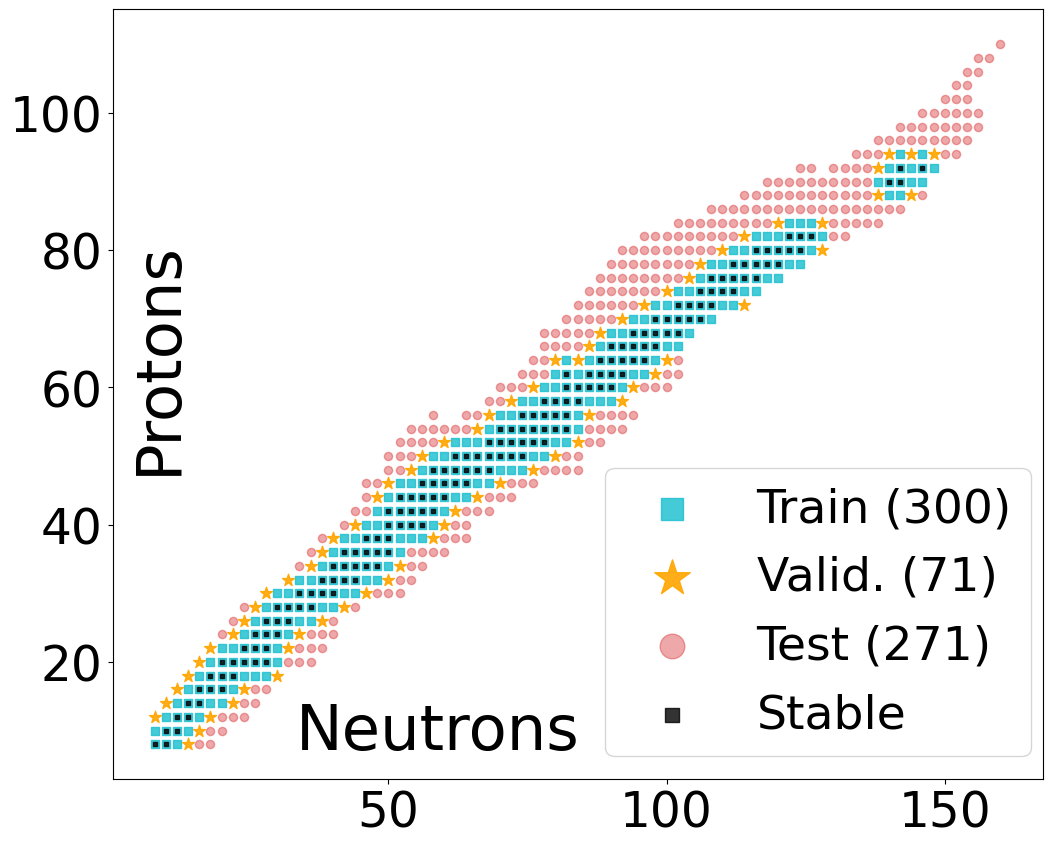

In [38]:
plt.rc("xtick", labelsize=35)
plt.rc("ytick", labelsize=35)

fig, ax = plt.subplots(figsize=(12,10), dpi=100)


color_trainig=colors[9]
color_validation='orange'
color_testing=colors[3]

marker_trainig='s'
marker_validation='*'
marker_testing='o'



size_trainig=30
size_validation=80
size_testing=35

alpha_trainig=0.8
alpha_validation=0.9
alpha_testing=0.4



ax.scatter(x = training_set.T[0], y = training_set.T[1], label = "Train ("+ str(len(training_set))+")", alpha = alpha_trainig,color=color_trainig,s=size_trainig,marker=marker_trainig)

ax.scatter(x = validation_set.T[0], y = validation_set.T[1], label = "Valid. (" + str(len(validation_set))+")", alpha = alpha_validation,color=color_validation,s=size_validation,marker=marker_validation)

ax.scatter(x = test_set.T[0], y = test_set.T[1], label = "Test (" + str(len(test_set))+")", alpha = alpha_testing,color=color_testing,s=size_testing,marker=marker_testing)


ax.scatter(x = stable_coordinates.T[0], y = stable_coordinates.T[1], label = "Stable", alpha = 0.8,color='black',s=11,marker="s")







# plt.xlabel("Neutrons",fontsize=45, labelpad=-20)


plt.xlabel('')

plt.annotate('Neutrons', xy=(0.35, 0.1), xycoords='axes fraction',
             ha='center', va='top', fontsize=45) 
plt.ylabel('')

plt.annotate('Protons', xy=(0.05,0.7), xycoords='axes fraction',
             ha='center', va='top', fontsize=45,rotation =90) 


# plt.ylabel("Protons",fontsize=45)
plt.legend(fontsize=34,markerscale=3 ,loc =(0.53,0.03))
plt.show()

In [39]:

# scenario = "1g1b"
# scenario = "3g10b"
# scenario = "1p3g10b"
# Fix random seed

# n_perfect =0
# n_good = 0
# n_bad = 0
# n_terrible=5


n_perfect =0
n_good = 3
n_bad = 5
n_terrible=10

n_classes=[n_perfect,n_good,n_bad,n_terrible]
# n_Labels=["Perfect Model", "Good Models", "Inter. Models","Bad Models"]
n_Labels=["Perfect M.", "Good M.", "Inter. M.","Bad M."]







# masses_truth = LDM_extended(truth_params,[input_NZ["Z"], input_NZ["N"]]) 

models_output = {}
models_output_train = {}
models_output_validation = {}
models_output_test = {}

models_output_target=[]






# #Option 1: Constructing the data by adding a random noise to the output of the models
# #Perfect Models Loop
# params = PerfectM_params
# for i in range(n_perfect):
#     models_output[str("PerfectModel_")+str(i)] = LDM_extended(params,[input_NZ["Z"], input_NZ["N"]])+ np.random.normal(0,1,size=len(input_NZ)) * noise_term_p


# #Good Models Loop
# params = GoodM_params
# for i in range(n_good):
#     models_output[str("GoodModel_")+str(i)] = LDM_extended(params,[input_NZ["Z"], input_NZ["N"]])+ np.random.normal(0,1,size=len(input_NZ)) * noise_term_g

# #Bad Models Loop
# params = BadM_params
# for i in range(n_bad):
#     models_output[str("IntermediateModel_")+str(i)] = LDM_extended(params,[input_NZ["Z"], input_NZ["N"]])+ np.random.normal(0,1,size=len(input_NZ)) * noise_term_b

# #Terrible Models Loop
# params = TerribleM_params
# for i in range(n_terrible):
#     models_output[str("BadModel_")+str(i)] = LDM_extended(params,[input_NZ["Z"], input_NZ["N"]])+ np.random.normal(0,1,size=len(input_NZ)) * noise_term_t






#Option 2: Constructing the data by adding a random noise to the parameters of the models
#Perfect Models Loop
np.random.seed(142857)
params = PerfectM_params
for i in range(n_perfect):
    ran_params=params + np.random.normal(0,1,size=len(truth_params))*truth_params*params_noise_term_p
    models_output[str("PerfectModel_")+str(i)] = LDM_extended(ran_params,Full_set.T)+np.random.normal(0,1,size=len(Full_set)) * overall_output_noise


    # models_output_target[str("PerfectModel_")+str(i)] = LDM_extended(ran_params
    #                                                           ,target_isotope)
    models_output_target.append(LDM_extended(ran_params,target_isotope)+ np.random.normal(0,1,size=1) * overall_output_noise)


# special_param=6    

#Good Models Loop
np.random.seed(542857)
params = GoodM_params
for i in range(n_good):

    ran_params=params+ np.random.normal(0,1,size=len(truth_params))*truth_params*params_noise_term_g

    # ran_params[special_param]=0

    models_output[str("GoodModel_")+str(i)] = LDM_extended(ran_params
                                                           ,Full_set.T)+ np.random.normal(0,1,size=len(Full_set)) * overall_output_noise
    # models_output_target[str("GoodModel_")+str(i)] = LDM_extended(ran_params ,target_isotope)
    models_output_target.append(LDM_extended(ran_params ,target_isotope)+ np.random.normal(0,1,size=1) * overall_output_noise)



#Bad Models Loop
np.random.seed(342857)
params = BadM_params
for i in range(n_bad):
    ran_params=params+ np.random.normal(0,1,size=len(truth_params))*truth_params*params_noise_term_b
    # ran_params[special_param]=0

    models_output[str("IntermediateModel_")+str(i)] = LDM_extended(ran_params,Full_set.T)+ np.random.normal(0,1,size=len(Full_set)) * overall_output_noise
    
    # models_output_target[str("IntermediateModel_")+str(i)] = LDM_extended(ran_params ,target_isotope)
    models_output_target.append(LDM_extended(ran_params ,target_isotope)+ np.random.normal(0,1,size=1) * overall_output_noise)

    



#Terrible Models Loop
np.random.seed(442857)
params = TerribleM_params
for i in range(n_terrible):
    ran_params=params+ np.random.normal(0,1,size=len(truth_params))*truth_params*params_noise_term_t

    # ran_params[special_param]=0
    models_output[str("BadModel_")+str(i)] = LDM_extended(ran_params
                                                          ,Full_set.T)+ np.random.normal(0,1,size=len(Full_set)) * overall_output_noise
    
    # models_output_target[str("BadModel_")+str(i)] = LDM_extended(ran_params,target_isotope)
    models_output_target.append(LDM_extended(ran_params,target_isotope)+ np.random.normal(0,1,size=1) * overall_output_noise)




#This is done here to have a list of pure models, without the ground truth
key_list=list(models_output.keys())
np.random.seed(7*142857)
models_output['truth']=LDM_extended(truth_params,Full_set.T) + np.random.normal(0,1,size=len(Full_set))*overall_data_noise


models_output = pd.DataFrame(models_output)
models_output["N"] = Full_set.T[0]
models_output["Z"] = Full_set.T[1]
models_output["A"] = models_output["N"] + models_output["Z"]

models_output_target=np.array(models_output_target)
models_output_target_mean=np.mean(models_output_target)






In [40]:

models_output_train = models_output.iloc[train_coordinates]

models_output_validation = models_output.iloc[validation_coordinates]

models_output_test = models_output.iloc[test_coordinates]

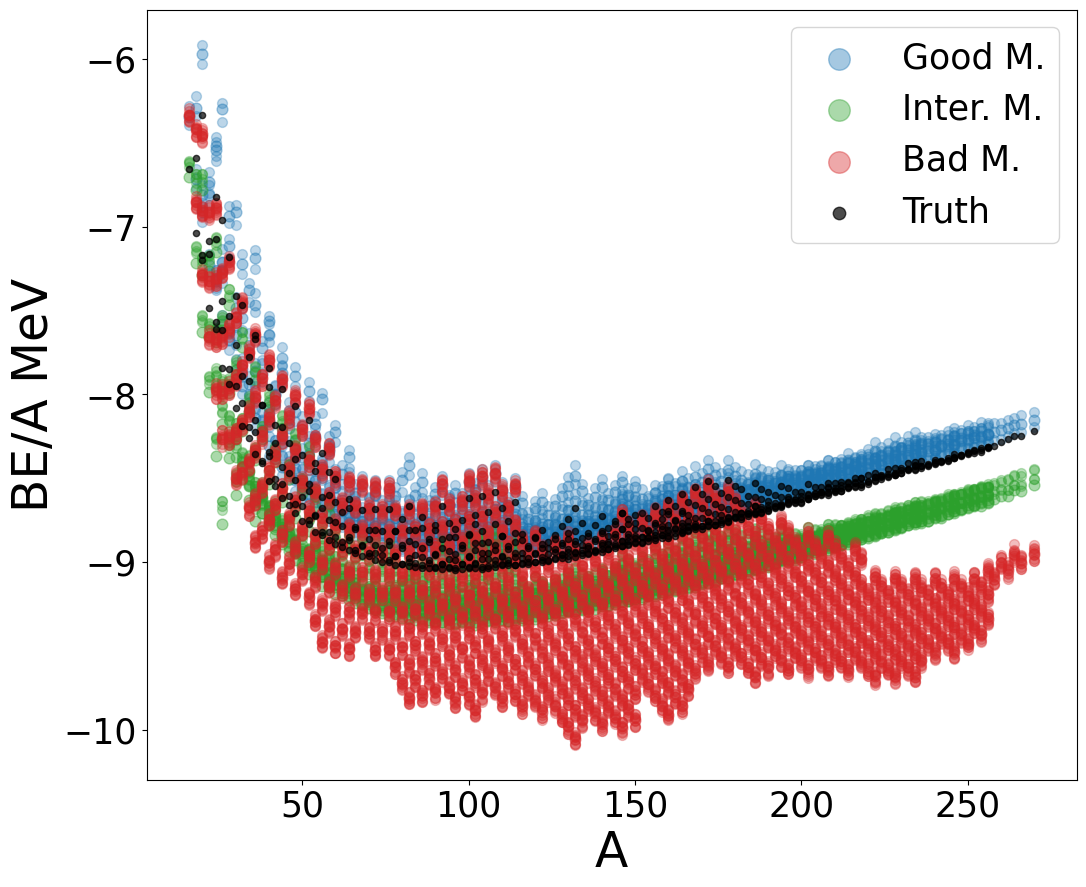

In [41]:
plt.rc("xtick", labelsize=25)
plt.rc("ytick", labelsize=25)

fig, ax = plt.subplots(figsize=(12,10), dpi=100)


model_index=0
class_index=0
for n_vals in n_classes:
    legend_flag=0
    for i in range(n_vals):
        if legend_flag==0:
            legend_flag=1
            ax.scatter(x = models_output["A"], y = models_output[key_list[model_index]], label = n_Labels[class_index], alpha = 0.4,color=colors[class_index],marker=markers[0],s=60)
        else:
            ax.scatter(x = models_output["A"], y = models_output[key_list[model_index]],  alpha = 0.3,color=colors[class_index],marker=markers[0],s=50)
        model_index=model_index+1
    class_index=class_index+1
    legend_flag=0





ax.scatter(x = models_output["A"], y = models_output['truth'], label = "Truth", alpha = 0.7,color='k',s=20)


plt.xlabel("A",fontsize=35)
plt.ylabel("BE/A MeV",fontsize=35)
plt.legend(fontsize=25,markerscale=2 )

plt.show()

In [42]:
residuals = models_output['truth'].values[:,None] - models_output[key_list].values 

residuals_train = models_output_train['truth'].values[:,None] - models_output_train[key_list].values 

residuals_validation  = models_output_validation['truth'].values[:,None] - models_output_validation[key_list].values 

residuals_test  = models_output_test['truth'].values[:,None] - models_output_test[key_list].values 



model_predictions=models_output[key_list].values
model_predictions_train=models_output_train[key_list].values
model_predictions_validation=models_output_validation[key_list].values
model_predictions_test=models_output_test[key_list].values






model_summary = {}
model_summary["rmse_all"] = np.sqrt(np.mean(residuals ** 2, axis = 0))
model_summary["rmse_train"] = np.sqrt(np.mean(residuals_train ** 2, axis = 0))
model_summary["rmse_validation"] = np.sqrt(np.mean(residuals_validation ** 2, axis = 0))
model_summary["rmse_test"] = np.sqrt(np.mean(residuals_test ** 2, axis = 0))


model_summary_df = pd.DataFrame(model_summary, index =key_list)
print(model_summary_df)
print(model_summary_df.style.format(precision = 2).to_latex())
#print(model_summary_df.to_latex(float_format="%.2f"))

                     rmse_all  rmse_train  rmse_validation  rmse_test
GoodModel_0          0.148716    0.143722         0.171979   0.147577
GoodModel_1          0.101454    0.093797         0.124102   0.103004
GoodModel_2          0.197228    0.196139         0.222384   0.191332
IntermediateModel_0  0.357591    0.315705         0.354176   0.399660
IntermediateModel_1  0.272951    0.228735         0.269050   0.315614
IntermediateModel_2  0.268349    0.223581         0.264172   0.311405
IntermediateModel_3  0.311422    0.269337         0.306080   0.353419
IntermediateModel_4  0.318688    0.276220         0.313291   0.361142
BadModel_0           0.611331    0.533750         0.580987   0.693936
BadModel_1           0.582782    0.506088         0.553851   0.663850
BadModel_2           0.608663    0.530705         0.578138   0.691586
BadModel_3           0.604920    0.528127         0.574039   0.686868
BadModel_4           0.639541    0.560801         0.607447   0.723965
BadModel_5          

In [43]:
model_summary_df

rmse_all  rmse_train  rmse_validation  rmse_test
GoodModel_0          0.148716    0.143722         0.171979   0.147577
GoodModel_1          0.101454    0.093797         0.124102   0.103004
GoodModel_2          0.197228    0.196139         0.222384   0.191332
IntermediateModel_0  0.357591    0.315705         0.354176   0.399660
IntermediateModel_1  0.272951    0.228735         0.269050   0.315614
IntermediateModel_2  0.268349    0.223581         0.264172   0.311405
IntermediateModel_3  0.311422    0.269337         0.306080   0.353419
IntermediateModel_4  0.318688    0.276220         0.313291   0.361142
BadModel_0           0.611331    0.533750         0.580987   0.693936
BadModel_1           0.582782    0.506088         0.553851   0.663850
BadModel_2           0.608663    0.530705         0.578138   0.691586
BadModel_3           0.604920    0.528127         0.574039   0.686868
BadModel_4           0.639541    0.560801         0.607447   0.723965
BadModel_5           0.594326    0.516795         0.564333   0.676530
BadModel_6           0.634318    0.555701         0.602920   0.718403
BadModel_7           0.642987    0.565710         0.610390   0.726317
BadModel_8           0.587956    0.512297         0.557316   0.668608
BadModel_9           0.621443    0.543878         0.589666   0.704511

In [44]:
Selected_element=50
Selected_element_name="Sn"

Z_range=(Selected_element,Selected_element)
N_range=(0,300)


filtered_models_output = models_output[(models_output['Z'] >= Z_range[0]) & (models_output['Z'] <= Z_range[1]) & 
                     (models_output['N'] >= N_range[0]) & (models_output['N'] <= N_range[1])]

filtered_models_output_train = models_output_train[(models_output_train['Z'] >= Z_range[0]) & (models_output_train['Z'] <= Z_range[1]) & 
                     (models_output_train['N'] >= N_range[0]) & (models_output_train['N'] <= N_range[1])]

filtered_models_output_test = models_output_test[(models_output_test['Z'] >= Z_range[0]) & (models_output_test['Z'] <= Z_range[1]) & 
                     (models_output_test['N'] >= N_range[0]) & (models_output_test['N'] <= N_range[1])]

filtered_models_output_validation = models_output_validation[(models_output_validation['Z'] >= Z_range[0]) & (models_output_validation['Z'] <= Z_range[1]) & 
                     (models_output_validation['N'] >= N_range[0]) & (models_output_validation['N'] <= N_range[1])]


stable_selected_isotope=[]

for i in range(len(stable_coordinates)):
    if stable_coordinates[i][1]==Selected_element:
        stable_selected_isotope.append(stable_coordinates[i])

stable_selected_isotope=np.array(stable_selected_isotope)

# df[df['Column1'].isin(values_array)]

filtered_models_output_stable = models_output_train[(models_output_train['Z'] >= Z_range[0]) & (models_output_train['Z'] <= Z_range[1]) & 
                     (models_output_train['N'].isin(stable_selected_isotope.T[0]))]

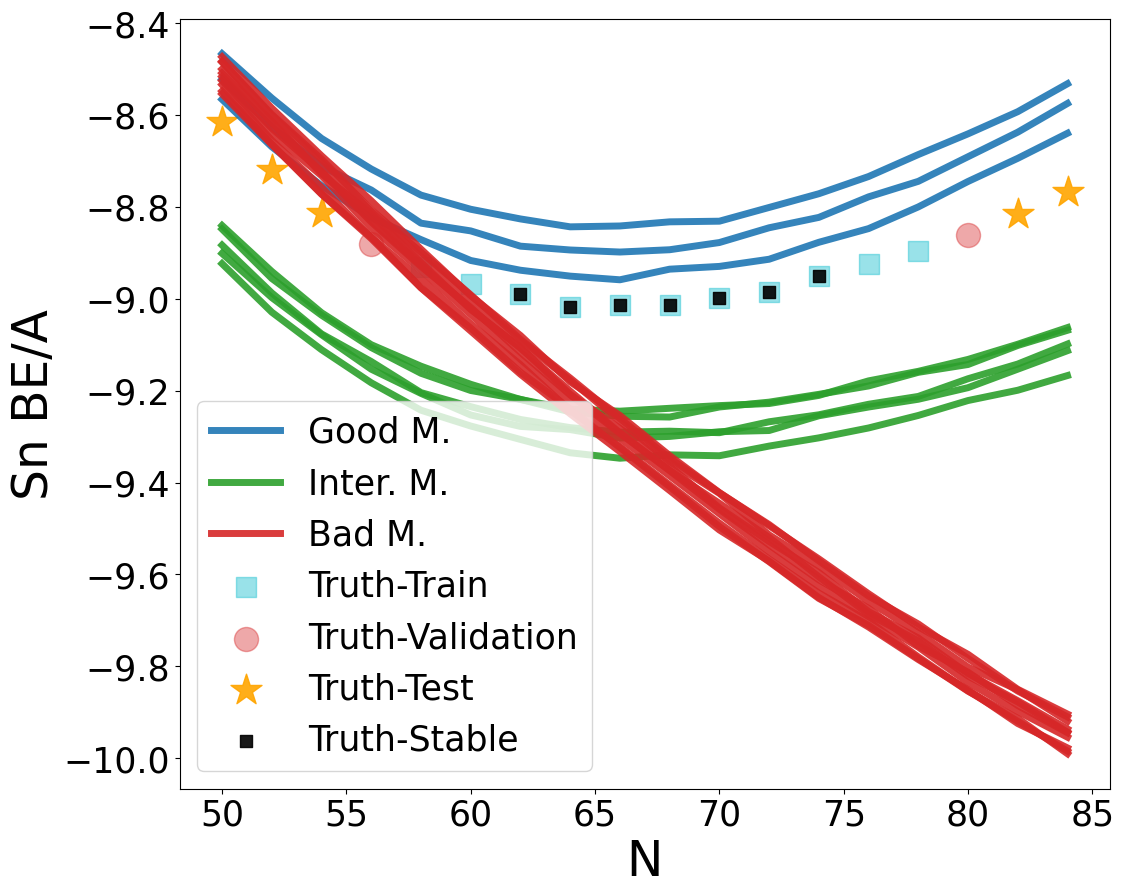

In [45]:
plt.rc("xtick", labelsize=25)
plt.rc("ytick", labelsize=25)

fig, ax = plt.subplots(figsize=(12,10), dpi=100)


model_index=0
class_index=0
for n_vals in n_classes:
    legend_flag=0
    for i in range(n_vals):
        if legend_flag==0:
            legend_flag=1
            ax.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], label = n_Labels[class_index], color=colors[class_index],alpha = 0.9,linewidth=5)
           
        else:
            ax.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], color=colors[class_index],alpha = 0.9,linewidth=5)
        model_index=model_index+1
    class_index=class_index+1
    legend_flag=0


# ax.scatter(x = training_set.T[0], y = training_set.T[1], label = "Training ("+ str(len(training_set))+")", alpha = 0.44,color=colors[1],s=40,marker="s")



# ax.scatter(x = validation_set.T[0], y = validation_set.T[1], label = "Validation (" + str(len(validation_set))+")", alpha = 0.4,color=colors[3],s=45,marker="o")


# ax.scatter(x = test_set.T[0], y = test_set.T[1], label = "Test (" + str(len(test_set))+")", alpha = 0.9,color='orange',s=90,marker="*")


# ax.scatter(x = stable_coordinates.T[0], y = stable_coordinates.T[1], label = "Stable", alpha = 0.8,color='black',s=13,marker="s")





ax.scatter(x = filtered_models_output_train["N"], y = filtered_models_output_train['truth'], label = "Truth-Train",  alpha = 0.44,color=colors[9],s=200,marker="s")

ax.scatter(x = filtered_models_output_validation["N"], y = filtered_models_output_validation['truth'], label = "Truth-Validation", alpha = 0.4,color=colors[3],s=300,marker="o")

ax.scatter(x = filtered_models_output_test["N"], y = filtered_models_output_test['truth'], label = "Truth-Test", alpha = 0.9,color='orange',s=550,marker="*")

ax.scatter(x = filtered_models_output_stable["N"], y = filtered_models_output_stable['truth'], label = "Truth-Stable", alpha = 0.9,color='k',s=80,marker="s")

plt.xlabel("N",fontsize=35)
plt.ylabel(Selected_element_name+" BE/A",fontsize=35)
plt.legend(fontsize=25,markerscale=1 )

plt.show()

## PCA - Analysis

In [46]:
predictions_mean= np.mean(model_predictions, axis=1)
predictions_train_mean= np.mean(model_predictions_train, axis=1)
predictions_validation_mean= np.mean(model_predictions_validation, axis=1)
predictions_test_mean= np.mean(model_predictions_test, axis=1)

In [47]:
if centering_data:
    model_predictions_train_processed=np.array([model_predictions_train.T[j]-predictions_train_mean for j in range(len(model_predictions_train.T))]).T
else:
    model_predictions_train_processed=np.copy(model_predictions_train)



In [48]:
U, S, Vt = np.linalg.svd(model_predictions_train_processed)

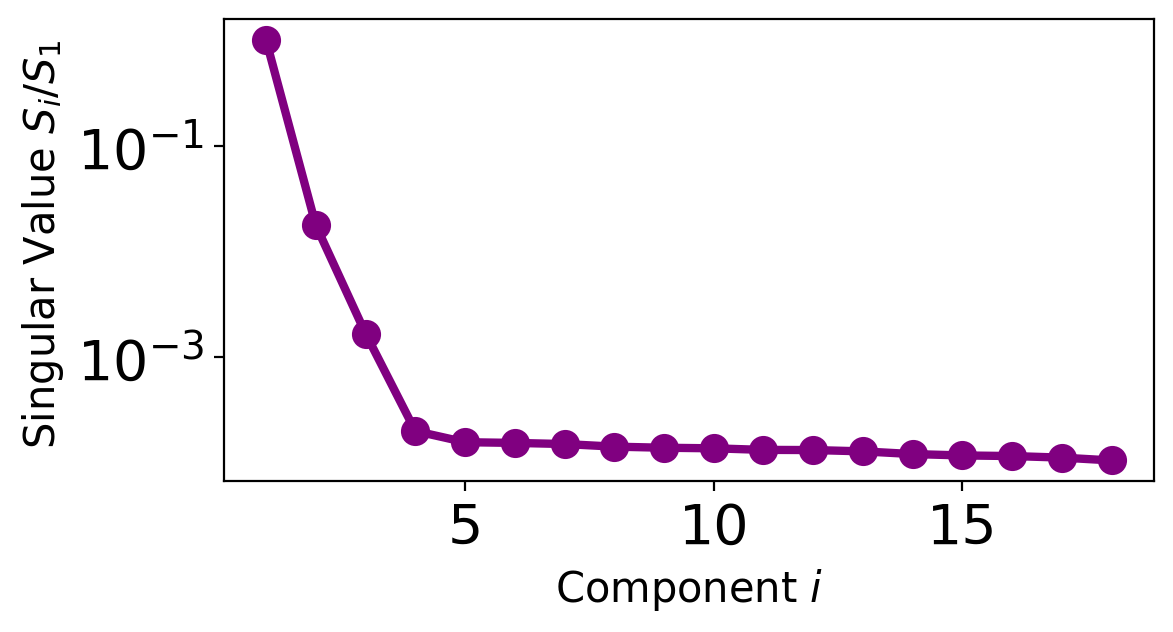

In [49]:
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)


fig, ax = plt.subplots(figsize=(6,3),dpi=200)
fig.patch.set_facecolor('white')

#We plot only up to n-1 singular values if we centered the data because the nth value is numerical noise ~10**(-15)
if centering_data:
    ax.scatter(np.arange(1,S.size), S[0:-1]/S[0],color='purple',s=90)
    ax.plot(np.arange(1,S.size), S[0:-1]/S[0],color='purple',linewidth=3)
else:
    ax.scatter(np.arange(1,S.size+1), S/S[0],color='purple',s=90)
    ax.plot(np.arange(1,S.size+1), S/S[0],color='purple',linewidth=3)    

ax.set_yscale('log')
ax.set_xlabel(r'Component $i$',fontsize=15)
ax.set_ylabel(r' Singular Value $S_i/S_1$',fontsize=15);
# plt.ylim(2*10**(-3),1.5)
# ax.set_xticks([0,5,10,15])
# plt.title("Singular values decay",fontsize=30)
plt.show()

In [50]:
components_kept=3
S_hat=np.array([S[i] for i in range(components_kept)])


#No scalling at all:
# U_hat=np.array([U.T[i]*S_hat[i] for i in range(components_kept)])
U_hat=np.array([U.T[i] for i in range(components_kept)])
Vt_hat=np.array([Vt[i]/S[i] for i in range(components_kept)])
Vt_hat_normalized=np.array([Vt[i] for i in range(components_kept)])

#Scaling manually:
# U_hat=np.array([U.T[i]*np.linalg.norm(predictions_train_mean) for i in range(components_kept)])
# #This represents the coefficients that we use to write the normalized PC everywhere as linear combinations of the original models. It is scaled by 
# # the values of S_hat such that the norm of the PC keeps ~ constant even as we increase the number of models
# Vt_hat=np.array([Vt[i]/S_hat[i]*np.linalg.norm(predictions_train_mean) for i in range(components_kept)])   
# #These are the normalized coefficients (norm[Vt_hat_normalized[i]] is 1). We use this to plot PC projections to distinguish between clusters of models
# Vt_hat_normalized=np.array([Vt[i] for i in range(components_kept)])







if centering_data:
    num_components=components_kept+1
else:
    num_components=components_kept


In [51]:
#Creating principal components that are for training. These should be equivalent to \hat U, and if they are not there is something wrong



models_PC_train = {}

if centering_data:
    models_PC_train[str("PC_0")] = predictions_train_mean
    
for i in range(components_kept):
    models_PC_train[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_train.T)

models_PC_train["N"] = models_output_train["N"]
models_PC_train["Z"] = models_output_train["Z"]
models_PC_train["A"] = models_PC_train["N"] + models_PC_train["Z"]

models_PC_training = pd.DataFrame(models_PC_train)



In [52]:
#Creating principal components that are for validation



models_PC_validation = {}

if centering_data:
    models_PC_validation[str("PC_0")] = predictions_validation_mean
    
for i in range(components_kept):
    models_PC_validation[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_validation.T)

models_PC_validation["N"] = models_output_validation["N"]
models_PC_validation["Z"] = models_output_validation["Z"]
models_PC_validation["A"] = models_PC_validation["N"] + models_PC_validation["Z"]

models_PC_validation = pd.DataFrame(models_PC_validation)



In [53]:
#Creating principal components that are for testing



models_PC_testing = {}

if centering_data:
    models_PC_testing[str("PC_0")] = predictions_test_mean
for i in range(components_kept):
    # models_PC_testing[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_test.T)*S_hat[i]
    models_PC_testing[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_test.T)

models_PC_testing["N"] = models_output_test["N"]
models_PC_testing["Z"] = models_output_test["Z"]
models_PC_testing["A"] = models_PC_testing["N"] + models_PC_testing["Z"]

models_PC_testing = pd.DataFrame(models_PC_testing)






In [54]:
#Creating principal components that are valid everywhere (testing + training + validation)
models_PC = {}

if centering_data:
    models_PC[str("PC_0")] = predictions_mean

for i in range(components_kept):
    models_PC[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions.T)

models_PC = pd.DataFrame(models_PC)
models_PC["N"] = Full_set.T[0]
models_PC["Z"] = Full_set.T[1]
models_PC["A"] = models_PC["N"] + models_PC["Z"]

In [55]:
filtered_models_PC = models_PC[(models_PC['Z'] >= Z_range[0]) & (models_PC['Z'] <= Z_range[1]) & 
                     (models_PC['N'] >= N_range[0]) & (models_PC['N'] <= N_range[1])]

In [56]:
key_list_PCs=list(filtered_models_PC.keys())

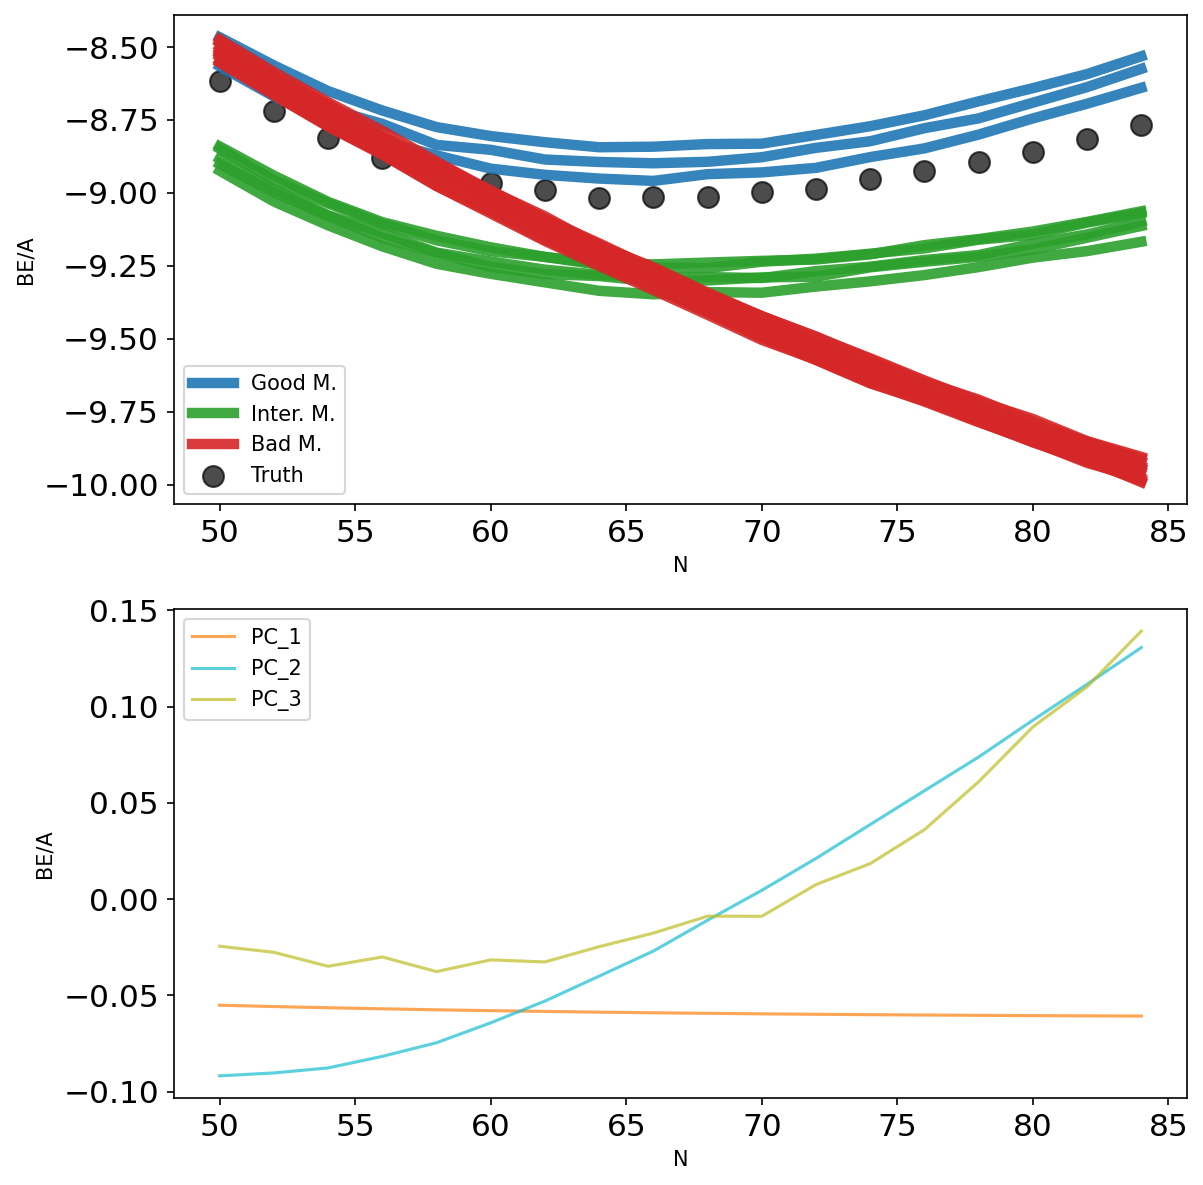

In [57]:
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)

# fig, ax = plt.subplots(figsize=(12,10), dpi=100)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8),dpi=150)


model_index=0
class_index=0
for n_vals in n_classes:
    legend_flag=0
    for i in range(n_vals):
        if legend_flag==0:
            legend_flag=1
            ax1.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], label = n_Labels[class_index], color=colors[class_index],alpha = 0.9,linewidth=5)
           
        else:
            ax1.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], color=colors[class_index],alpha = 0.9,linewidth=5)
        model_index=model_index+1
    class_index=class_index+1
    legend_flag=0

ax1.scatter(x = filtered_models_output["N"], y = filtered_models_output['truth'], label = "Truth", alpha = 0.7,color='k',s=100)

ax1.set_xlabel("N")
ax1.set_ylabel("BE/A")
ax1.legend( )







for i in range(num_components):
    ax2.plot(filtered_models_PC["N"], filtered_models_PC[key_list_PCs[i]], label =key_list_PCs[i], alpha = 0.7,color=colors[-i])

ax2.set_xlabel("N")
ax2.set_ylabel("BE/A")
ax2.legend()





plt.tight_layout()

plt.show()

In [58]:
x_values=models_PC["N"].tolist()
y_values=models_PC["Z"].tolist()
pc_data=[]

if centering_data:
    pc_data.append([x_values,y_values,models_PC["PC_0"].tolist()])

for i in range(components_kept):
    pc_data.append([x_values,y_values,models_PC[str("PC_")+str(i+1)].tolist()])

    
pc_data=np.array(pc_data)    

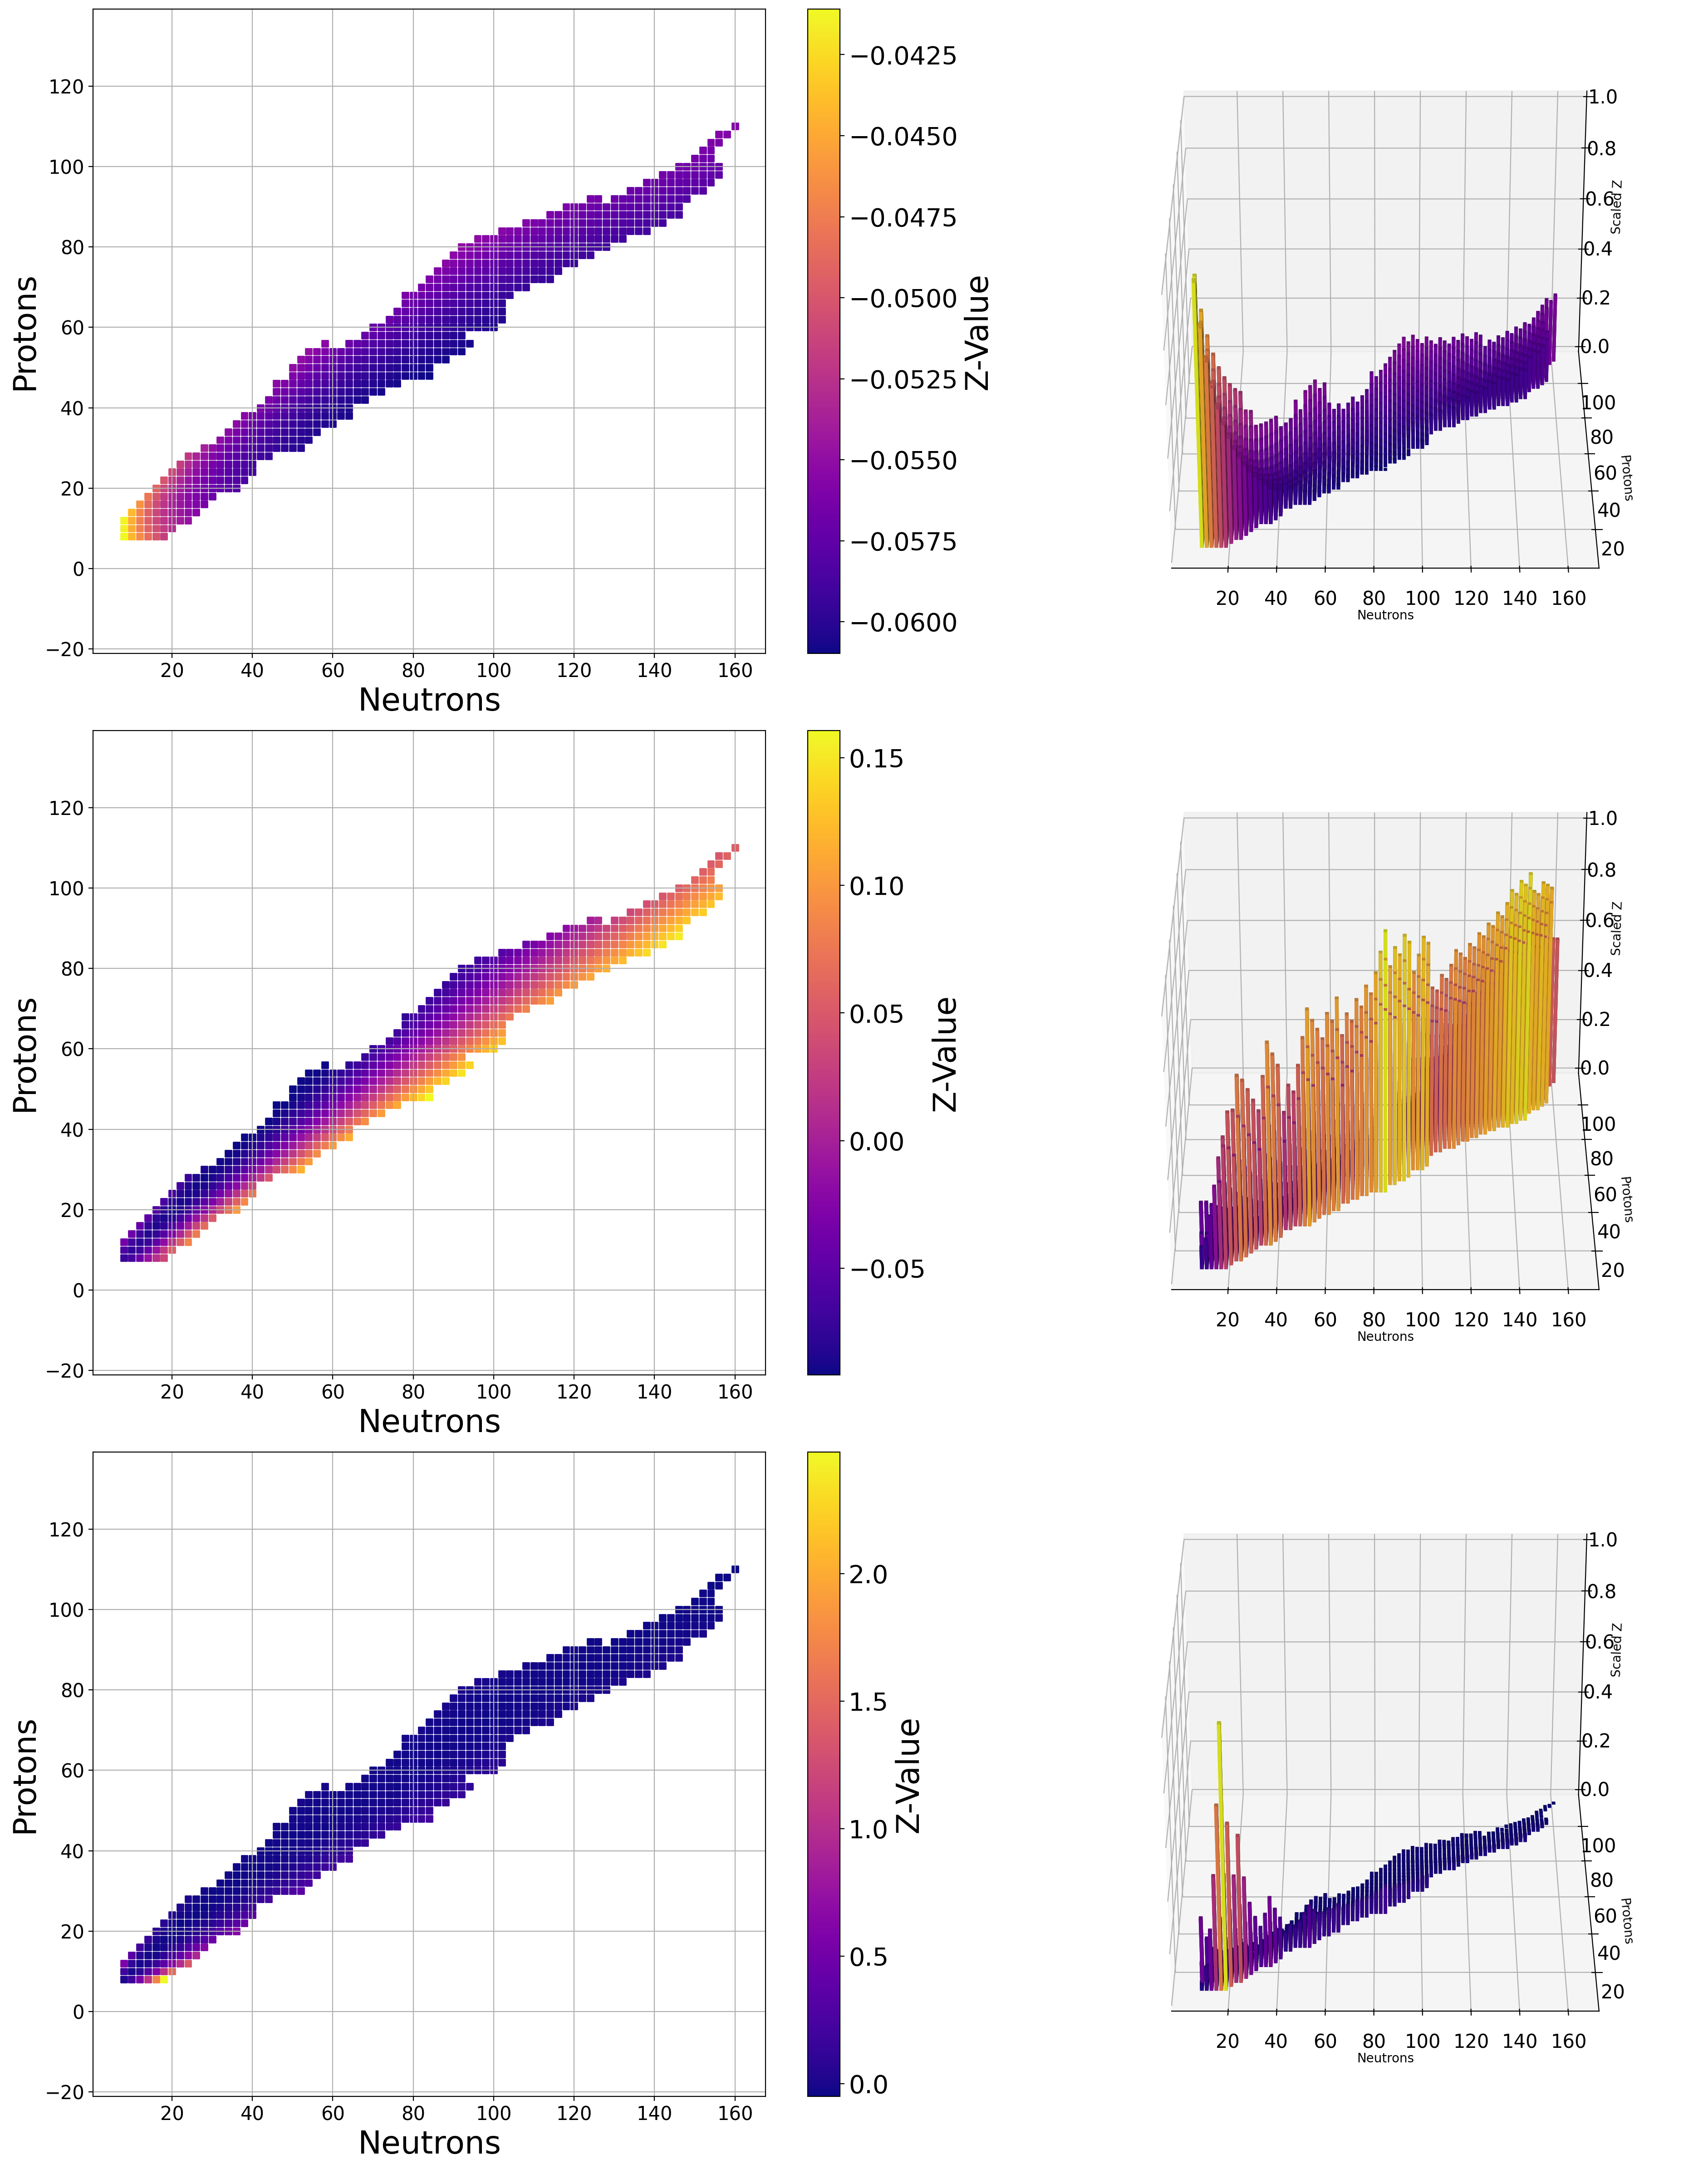

In [59]:
PlotMultiple(pc_data,[30,-90])

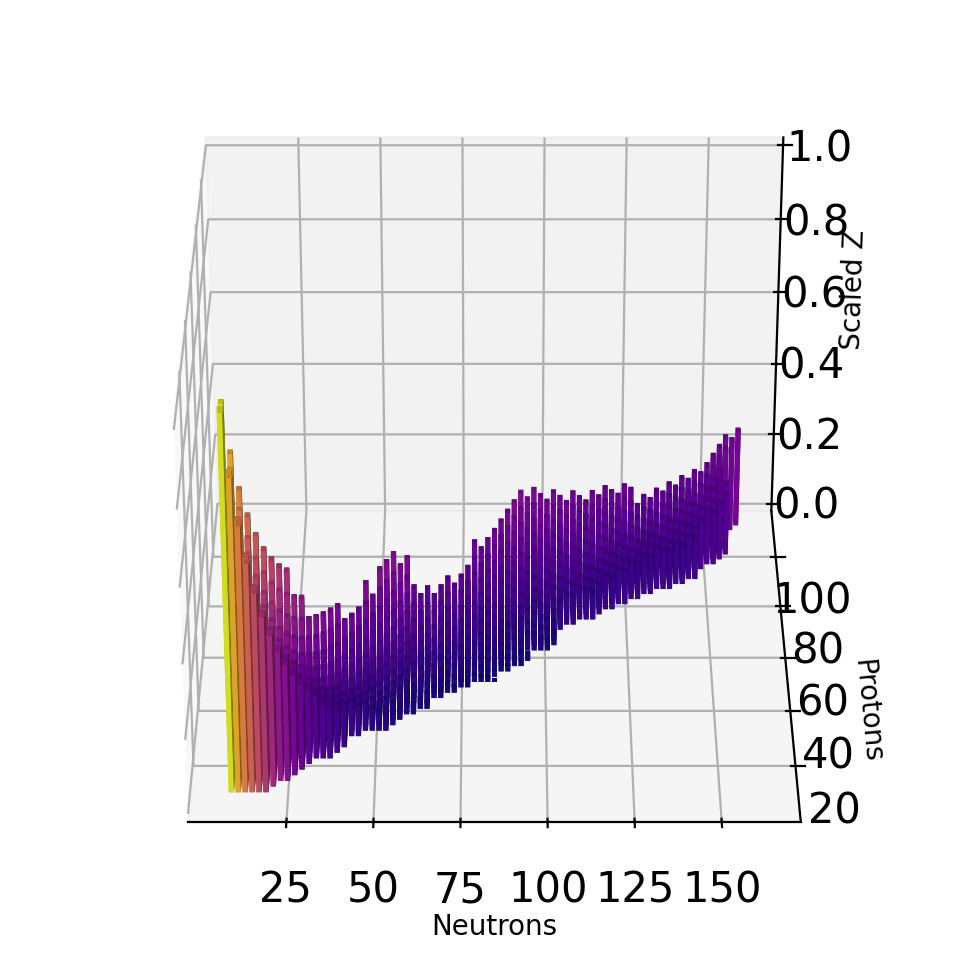

In [60]:
Plotter3D_single(pc_data[0],elev=30,azim=-90)

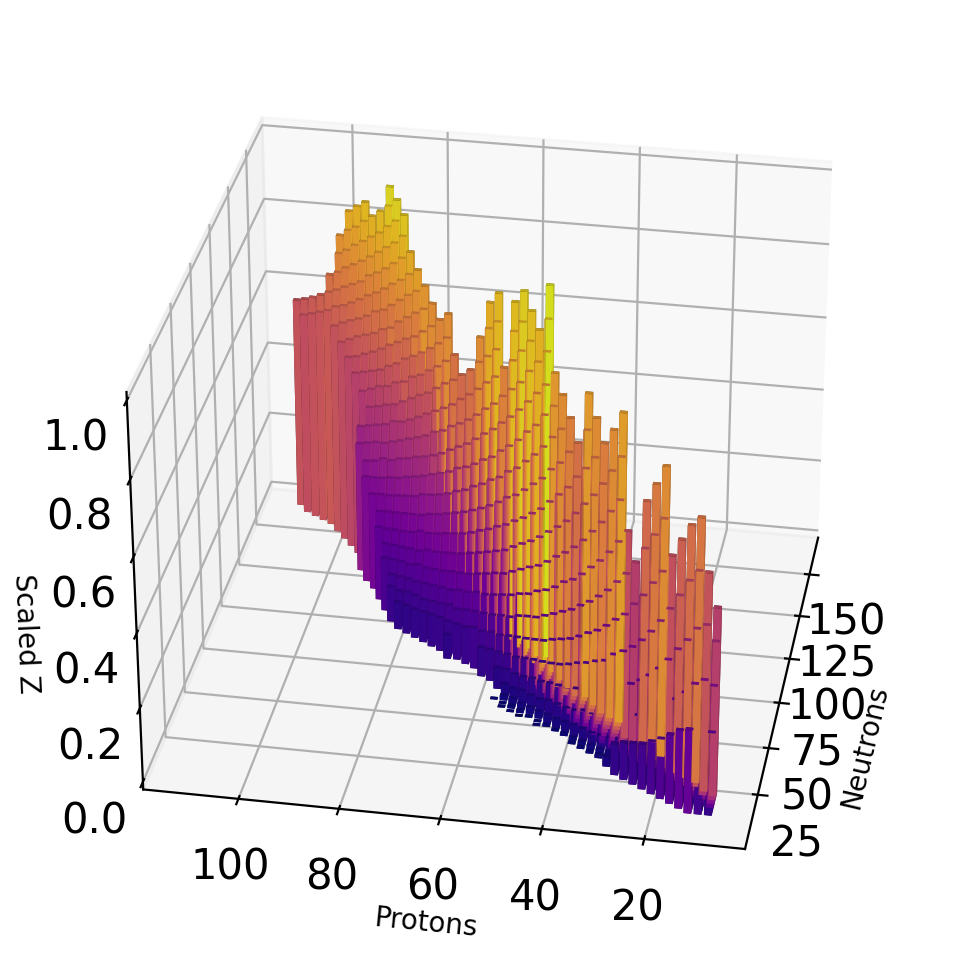

In [61]:
Plotter3D_single(pc_data[1],elev=30,azim=-170)

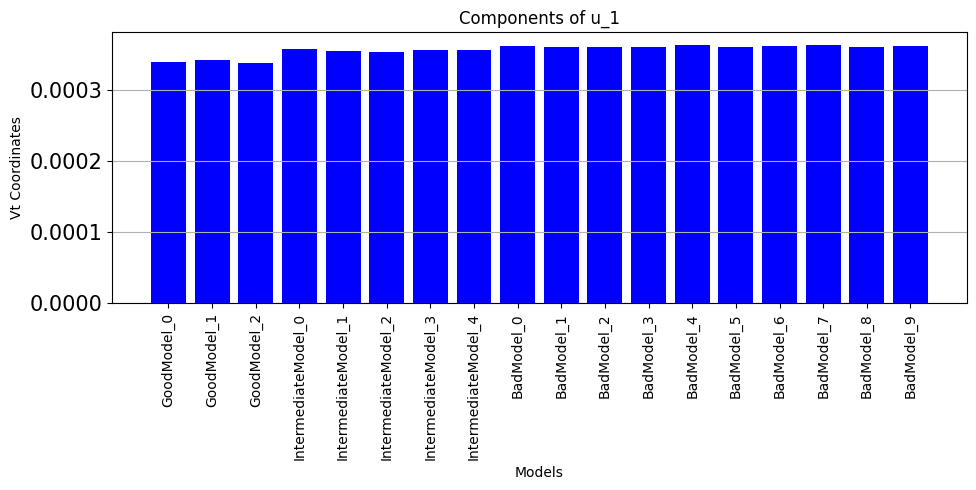

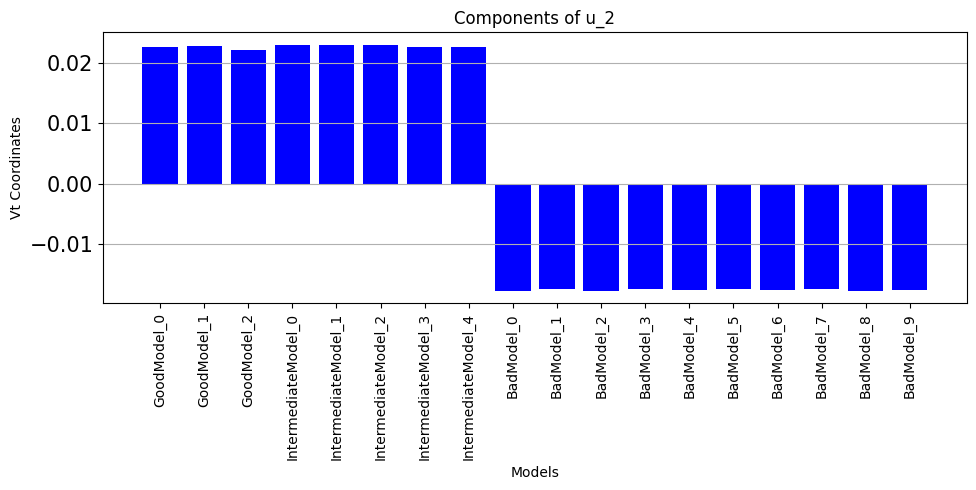

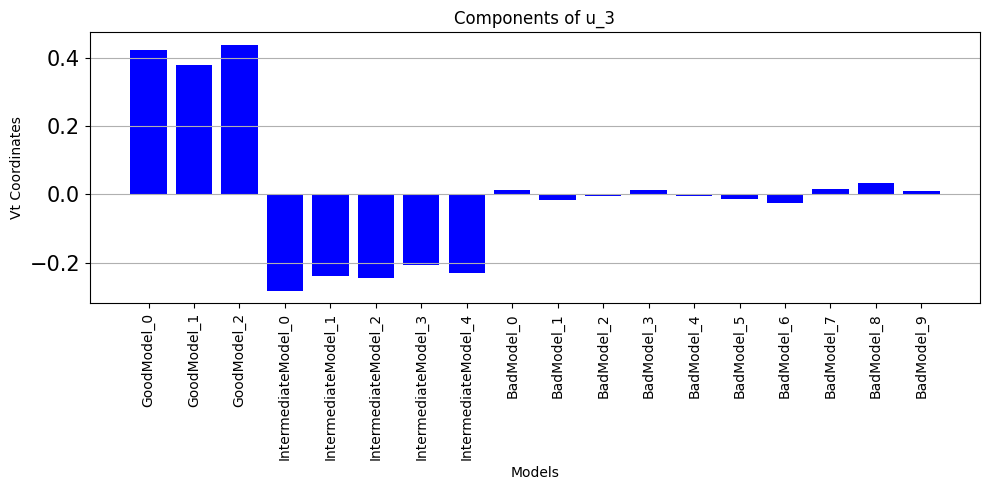

In [62]:


for i in range(len(Vt_hat)):

    plot_bars(Vt_hat[i], key_list, title=f"Components of u_{i+1}", color='blue')

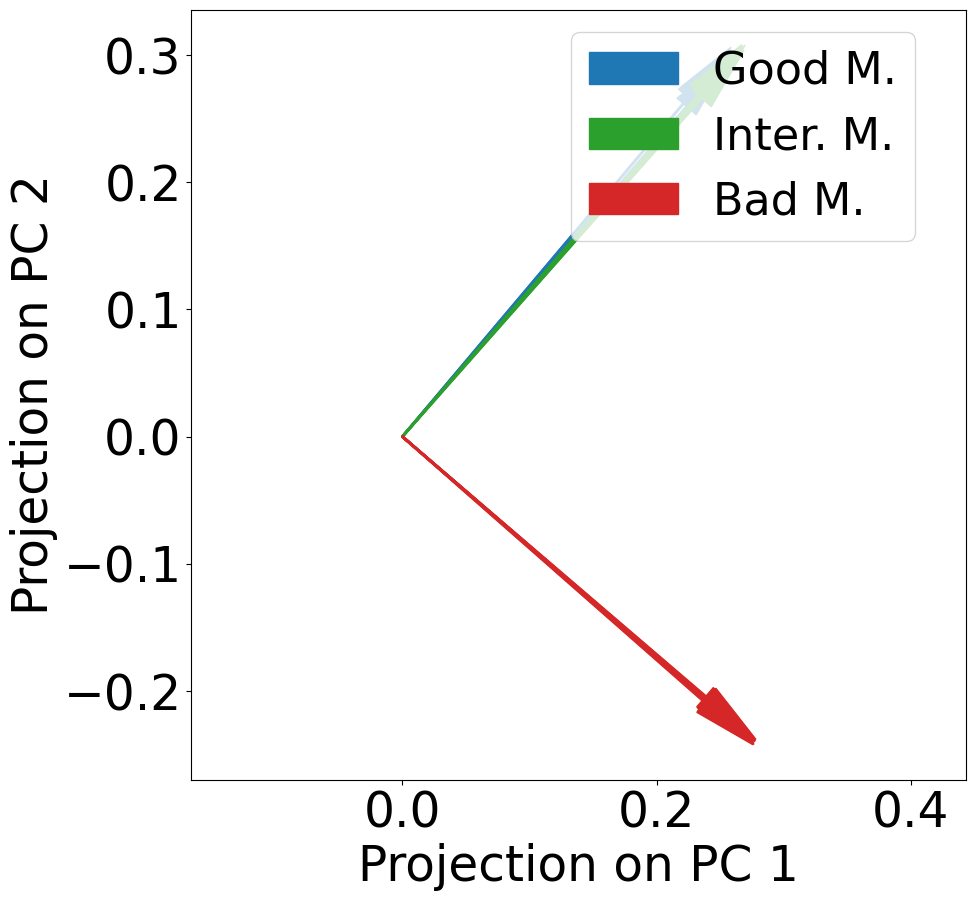

In [63]:

plt.rc("xtick", labelsize=35)
plt.rc("ytick", labelsize=35)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

model_index=0
class_index=0

visited_model=0
for n_vals in n_classes:
    legend_flag=0
    for i in range(n_vals):
        if legend_flag==0:
            legend_flag=1

            ax.arrow(0, 0, Vt_hat_normalized.T[visited_model][0],Vt_hat_normalized.T[visited_model][1], head_width=0.02, head_length=0.05, fc=colors[class_index], ec=colors[class_index],label=n_Labels[class_index])
           
        else:
            ax.arrow(0, 0, Vt_hat_normalized.T[visited_model][0], Vt_hat_normalized.T[visited_model][1], head_width=0.02, head_length=0.05, fc=colors[class_index], ec=colors[class_index])
        model_index=model_index+1
        visited_model=visited_model+1
    class_index=class_index+1
    legend_flag=0


# Determine plot limits based on the maximum absolute values of the vectors
# max_val = max(max(abs(coordinate) for vector in list1 + list2 for coordinate in vector))
# plt.xlim(-0.25, 0.9)

# plt.ylim(-max_val-1, max_val+1)

plt.xlabel('Projection on PC 1',fontsize=35)
plt.ylabel('Projection on PC 2',fontsize=35)

plt.legend(loc=(0.49, 0.7),fontsize=32)
# ax.set_xticks([-0.2,0,0.2,0.4,0.6])
plt.axis('equal')
# plt.xlim(-0.25, 0.6)
# plt.ylim(-0.43, 0.5)

plt.show()


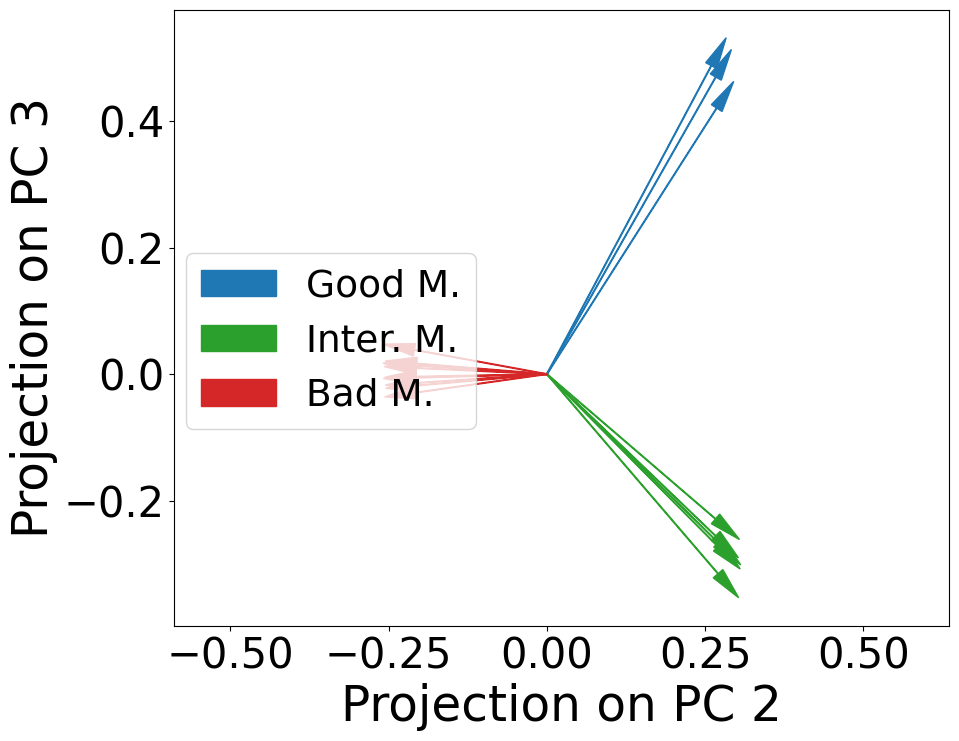

In [64]:

if components_kept>2:

    plt.rc("xtick", labelsize=30)
    plt.rc("ytick", labelsize=30)

    fig, ax = plt.subplots(figsize=(10,8), dpi=100)

    model_index=0
    class_index=0

    visited_model=0
    for n_vals in n_classes:
        legend_flag=0
        for i in range(n_vals):
            if legend_flag==0:
                legend_flag=1

                plt.arrow(0, 0, Vt_hat_normalized.T[visited_model][1], Vt_hat_normalized.T[visited_model][2], head_width=0.02, head_length=0.05, fc=colors[class_index], ec=colors[class_index],label=n_Labels[class_index])
            
            else:
                plt.arrow(0, 0, Vt_hat_normalized.T[visited_model][1], Vt_hat_normalized.T[visited_model][2], head_width=0.02, head_length=0.05, fc=colors[class_index], ec=colors[class_index])
            model_index=model_index+1
            visited_model=visited_model+1
        class_index=class_index+1
        legend_flag=0


    # Determine plot limits based on the maximum absolute values of the vectors
    # max_val = max(max(abs(coordinate) for vector in list1 + list2 for coordinate in vector))
    # plt.xlim(-max_val-1, max_val+1)
    # plt.ylim(-max_val-1, max_val+1)

    plt.xlabel('Projection on PC 2',fontsize=35)
    plt.ylabel('Projection on PC 3',fontsize=35)

    plt.legend(loc=(0.015, 0.32),fontsize=27)

    plt.axis('equal')

    plt.show()


In [65]:
X=np.copy(U_hat)
if centering_data:
    y=np.copy(models_output_train["truth"].tolist())-predictions_train_mean
else:
    y=np.copy(models_output_train["truth"].tolist())

In [66]:
#Making the list of principal components across the train part. These should be identical to the X on top made by \hat U
X_train=[]
for i in range(num_components):
    X_train.append(models_PC_train[key_list_PCs[i]].tolist() )
# if centering_data==True:
#     for i in range(num_components):
#         X_train.append(models_PC_train[key_list_PCs[i]].tolist() )

# else:
#     for i in range(num_components):
#         X_train.append(models_PC_train[key_list_PCs[i]].tolist())

X_train=np.array(X_train)

In [67]:
#Making the list of principal components across the validation part
X_validation=[]
for i in range(num_components):
    X_validation.append(models_PC_validation[key_list_PCs[i]].tolist())
# if centering_data==True:
#     for i in range(num_components):
#         X_validation.append(models_PC_validation[key_list_PCs[i]].tolist())
# else:
#     for i in range(num_components):
#         X_validation.append(models_PC_validation[key_list_PCs[i]].tolist())
X_validation=np.array(X_validation)

In [68]:
#Making the list of principal components across the testing part
X_test=[]
for i in range(num_components):
    X_test.append(models_PC_testing[key_list_PCs[i]].tolist())

# if centering_data==True:
#     for i in range(num_components):
#         X_test.append(models_PC_testing[key_list_PCs[i]].tolist())
# else:
#     for i in range(num_components):
#         X_test.append(models_PC_testing[key_list_PCs[i]].tolist())
X_test=np.array(X_test)

In [69]:
#Making the list of principal components across the entire chart (training+validation+testing)
X_full=[]
for i in range(num_components):
    X_full.append(models_PC[key_list_PCs[i]].tolist())
# if centering_data==True:
#     for i in range(num_components):
#         X_full.append(models_PC[key_list_PCs[i]].tolist())
# else:
#     for i in range(num_components):
#         X_full.append(models_PC[key_list_PCs[i]].tolist())
X_full=np.array(X_full)

## For unconstrained estimation the problem is trivial and can be solved by linear equations:

In [70]:
# 1) Find the least square solution for the training part
X_T_X=X.dot(X.T)
X_T_X_inv = np.linalg.inv(X_T_X)

beta = X_T_X_inv.dot(X).dot(y)

# if centering_data==True:
#     supermodel=X.T.dot(beta) + predictions_train_mean
# else:
#     supermodel=X.T.dot(beta)

#1.5) Construct the super model across the entire range and the test range
if centering_data:
    beta_full= np.insert(beta, 0, 1)  #Augmenting the beta list to add a "1" at the begining so it can use the PC0 (the mean)
else:
    beta_full=np.copy(beta)



supermodel=X_train.T.dot(beta_full)

supermodel_train=X_train.T.dot(beta_full)
# supermodel_train=np.copy(supermodel)

supermodel_validation=X_validation.T.dot(beta_full)
supermodel_test=X_test.T.dot(beta_full)
supermodel_full=X_full.T.dot(beta_full)


# 2) Construct the covariance matrix
if centering_data==True:
    residuals = y - supermodel + predictions_train_mean
else:
    residuals = y - supermodel
sigma_squared = np.sum(residuals**2) / len(residuals) 
cov_matrix = sigma_squared * X_T_X_inv

# 3) Make a corner plot
samples = np.random.multivariate_normal(beta, cov_matrix, size=500000)


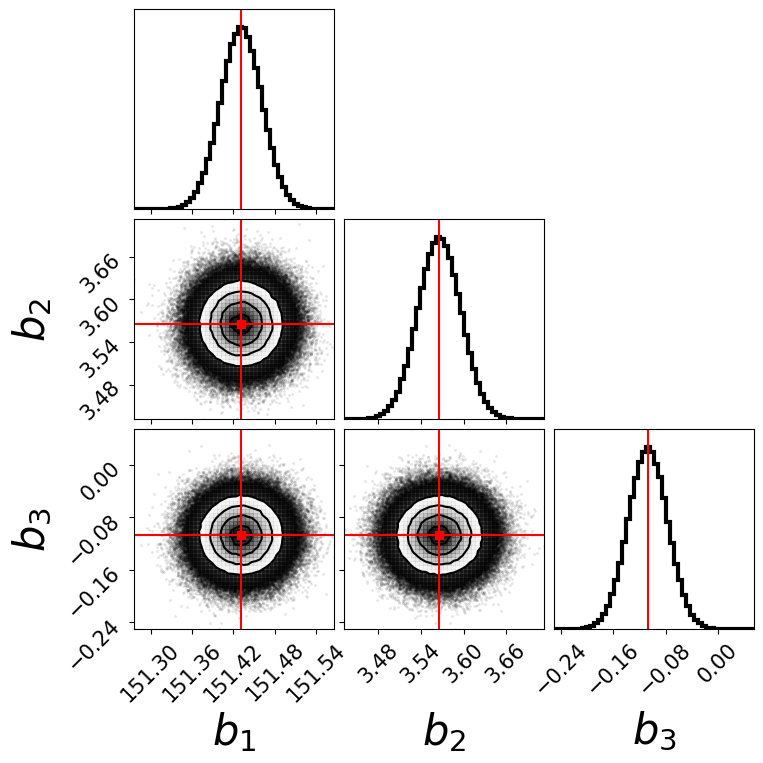

In [71]:
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)

figure = corner.corner(samples,bins=50, dpi=300, hist_kwargs={"linewidth": 3},
                       labels=[f'$b_{i}$' for i in range(1, len(beta) + 1)], truths=beta,truth_color="r",
                       label_kwargs={"fontsize": 30},labelpad=0.1)


plt.show()

## For constrained estimation the problem is more complex and we need to define our likelihood and prior functions (we are putting the constraint in the prior)

In [72]:
if centering_data:  #Calculating a bias term to add to the coefficient transformation to account for the \phi0 term
    bias0=np.full(len(model_predictions_train.T),1/len(model_predictions_train.T))
else:
    bias0=np.full(len(model_predictions_train.T),0)

In [73]:
def b1_finder(beta_2m,Vt_hat):
#     beta_2m is a list of the beta values that are active
    if len(beta_2m)<1:
        print("AAAAAAAAAAA!")
    return (1-np.sum(bias0)-np.sum(np.dot(Vt_hat[1:].T,beta_2m)))/np.sum(Vt_hat[0].T)

In [74]:
# Define the likelihood function for given errors sigma
def log_likelihood_PC(beta_2m,data):
    #Assumed format for data=[yvals], it is also assummed to be centered or not centered directly (either y-\phi0 or just y)
    
    beta = np.insert(beta_2m, 0, b1_finder(beta_2m,Vt_hat))
    
    residuals=y-X_train.T.dot(beta)

    return -np.sum(residuals**2)




In [75]:
# Define the likelihood function for given errors sigma
def log_likelihood_PC_unormalized(beta,data):
    #Assumed format for data=[yvals], it is also assummed to be centered or not centered directly (either y-\phi0 or just y)
    
#     beta = np.insert(beta_2m, 0, b1_finder(beta_2m,Vt_hat))
    
    residuals=y-X_train.T.dot(beta)

    return -np.sum(residuals**2)




In [76]:
# Define the prior function
def log_prior_PC(beta_2m,Vt_hat):
    beta = np.insert(beta_2m, 0, b1_finder(beta_2m,Vt_hat))
    
    omegas=np.dot(beta,Vt_hat) + bias0
    
    
    if  np.any(omegas < 0):
        return -np.infty
    else:
        return 0
    

In [77]:
# Define the prior function
def log_prior_PC_unormalized(beta,Vt_hat):
#     beta = np.insert(beta_2m, 0, b1_finder(beta_2m,Vt_hat))
    
    omegas=np.dot(beta,Vt_hat) + bias0
    
    return 0
    
    if  np.any(omegas < 0):
        return -np.infty
    else:
        return 0
    

In [78]:
# Define the Metropolis algorithm
def metropolis(data,sigma, log_prior,log_likelihood,\
               num_iterations, step_size,initial_parameters,Vt_hat,normalized=True):
#     step_size should be a list the size of the parameters of the model


    #thermalizing
    burn_samples=20000
    # Set the initial state of the chain
    params_current=initial_parameters
    params_list=[]
    posterior_list=[]
    
    acceptance_times=0
    
    cov_step_size=np.diag(step_size)**2
    

    
    log_posterior_current=(log_likelihood(params_current,data))/sigma**2 + (log_prior(params_current,Vt_hat))

    # Run the Metropolis-Hastings algorithm for burning
    for i in range(burn_samples):
        # Propose a new state for the chain
        params_proposed=np.random.multivariate_normal(params_current,cov_step_size)

        log_posterior_proposed=(log_likelihood(params_proposed,data))/sigma**2 + (log_prior(params_proposed,Vt_hat))
        
        # Calculate the acceptance probability
        acceptance_prob = min(1, np.exp((+log_posterior_proposed - log_posterior_current)))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            params_current = params_proposed
            log_posterior_current=log_posterior_proposed


    for i in range(num_iterations):
        params_proposed=np.random.multivariate_normal(params_current,cov_step_size)
   
        log_posterior_proposed=(log_likelihood(params_proposed,data))/sigma**2+ (log_prior(params_proposed,Vt_hat))
#         print(log_posterior_proposed)
        # Calculate the acceptance probability
        acceptance_prob = min(1, np.exp((+log_posterior_proposed - log_posterior_current)))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            params_current = params_proposed
            log_posterior_current=log_posterior_proposed
            acceptance_times=acceptance_times+1

        # Store the current state
        if normalized:
            params_list.append(np.insert(params_current, 0, b1_finder(params_current,Vt_hat)))
        else:
            params_list.append(params_current)
        posterior_list.append(log_posterior_current*sigma**2)
        
    
    #Rule of thumb acceptance is around 30%. 
    #You could plot the accuracy of the estimations as a function of this rate, that would be interesting to see. 
    print(acceptance_times/num_iterations*100,"%")
    
    return(np.array(params_list),np.array(posterior_list),\
           acceptance_times/num_iterations*100)

In [ ]:
# %%time
# #For the case of 1, 1, 1 models keeping 3 PC
# met_res=metropolis(y,0.05, log_prior_PC,log_likelihood_PC,\
#                100000, np.array([0.004,0.004]),np.array([0.0,0.0]),Vt_hat,normalized=True)

In [79]:
%%time
#For the case of 3, 5, 10 models keeping 3 PC
met_res=metropolis(y,0.05, log_prior_PC,log_likelihood_PC,\
               100000, np.array([0.002,0.002]),np.array([0.0,0.0]),Vt_hat,normalized=True)

22.755 %
CPU times: user 27.7 s, sys: 106 ms, total: 27.8 s
Wall time: 28.4 s


In [80]:
emp_sigma=np.sqrt(-np.mean(met_res[1])/len(y))

In [81]:
emp_sigma

0.061258660286817056

In [215]:
%%time
met_res=metropolis(y,emp_sigma, log_prior_PC,log_likelihood_PC,\
               300000, np.array([0.003,0.003]),np.array([0.0,0.0]),Vt_hat,normalized=True)

35.70733333333334 %
CPU times: user 1min 12s, sys: 193 ms, total: 1min 12s
Wall time: 1min 14s


In [217]:
np.sqrt(-np.mean(met_res[1])/len(y))/emp_sigma

0.9991721762807297

In [218]:
emp_sigma=np.sqrt(-np.mean(met_res[1])/len(y))

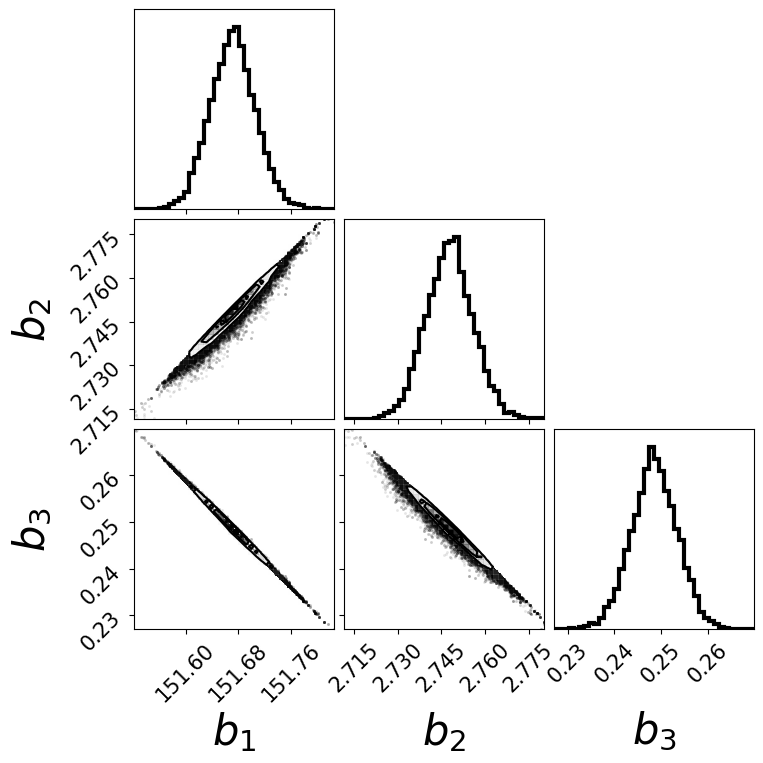

In [82]:
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)

figure = corner.corner(met_res[0],bins=40, dpi=300, hist_kwargs={"linewidth": 3},
                       labels=[f'$b_{i}$' for i in range(1, len(beta) + 1)],
#                        truths=beta,truth_color="r",
                       label_kwargs={"fontsize": 30},labelpad=0.1)


plt.show()

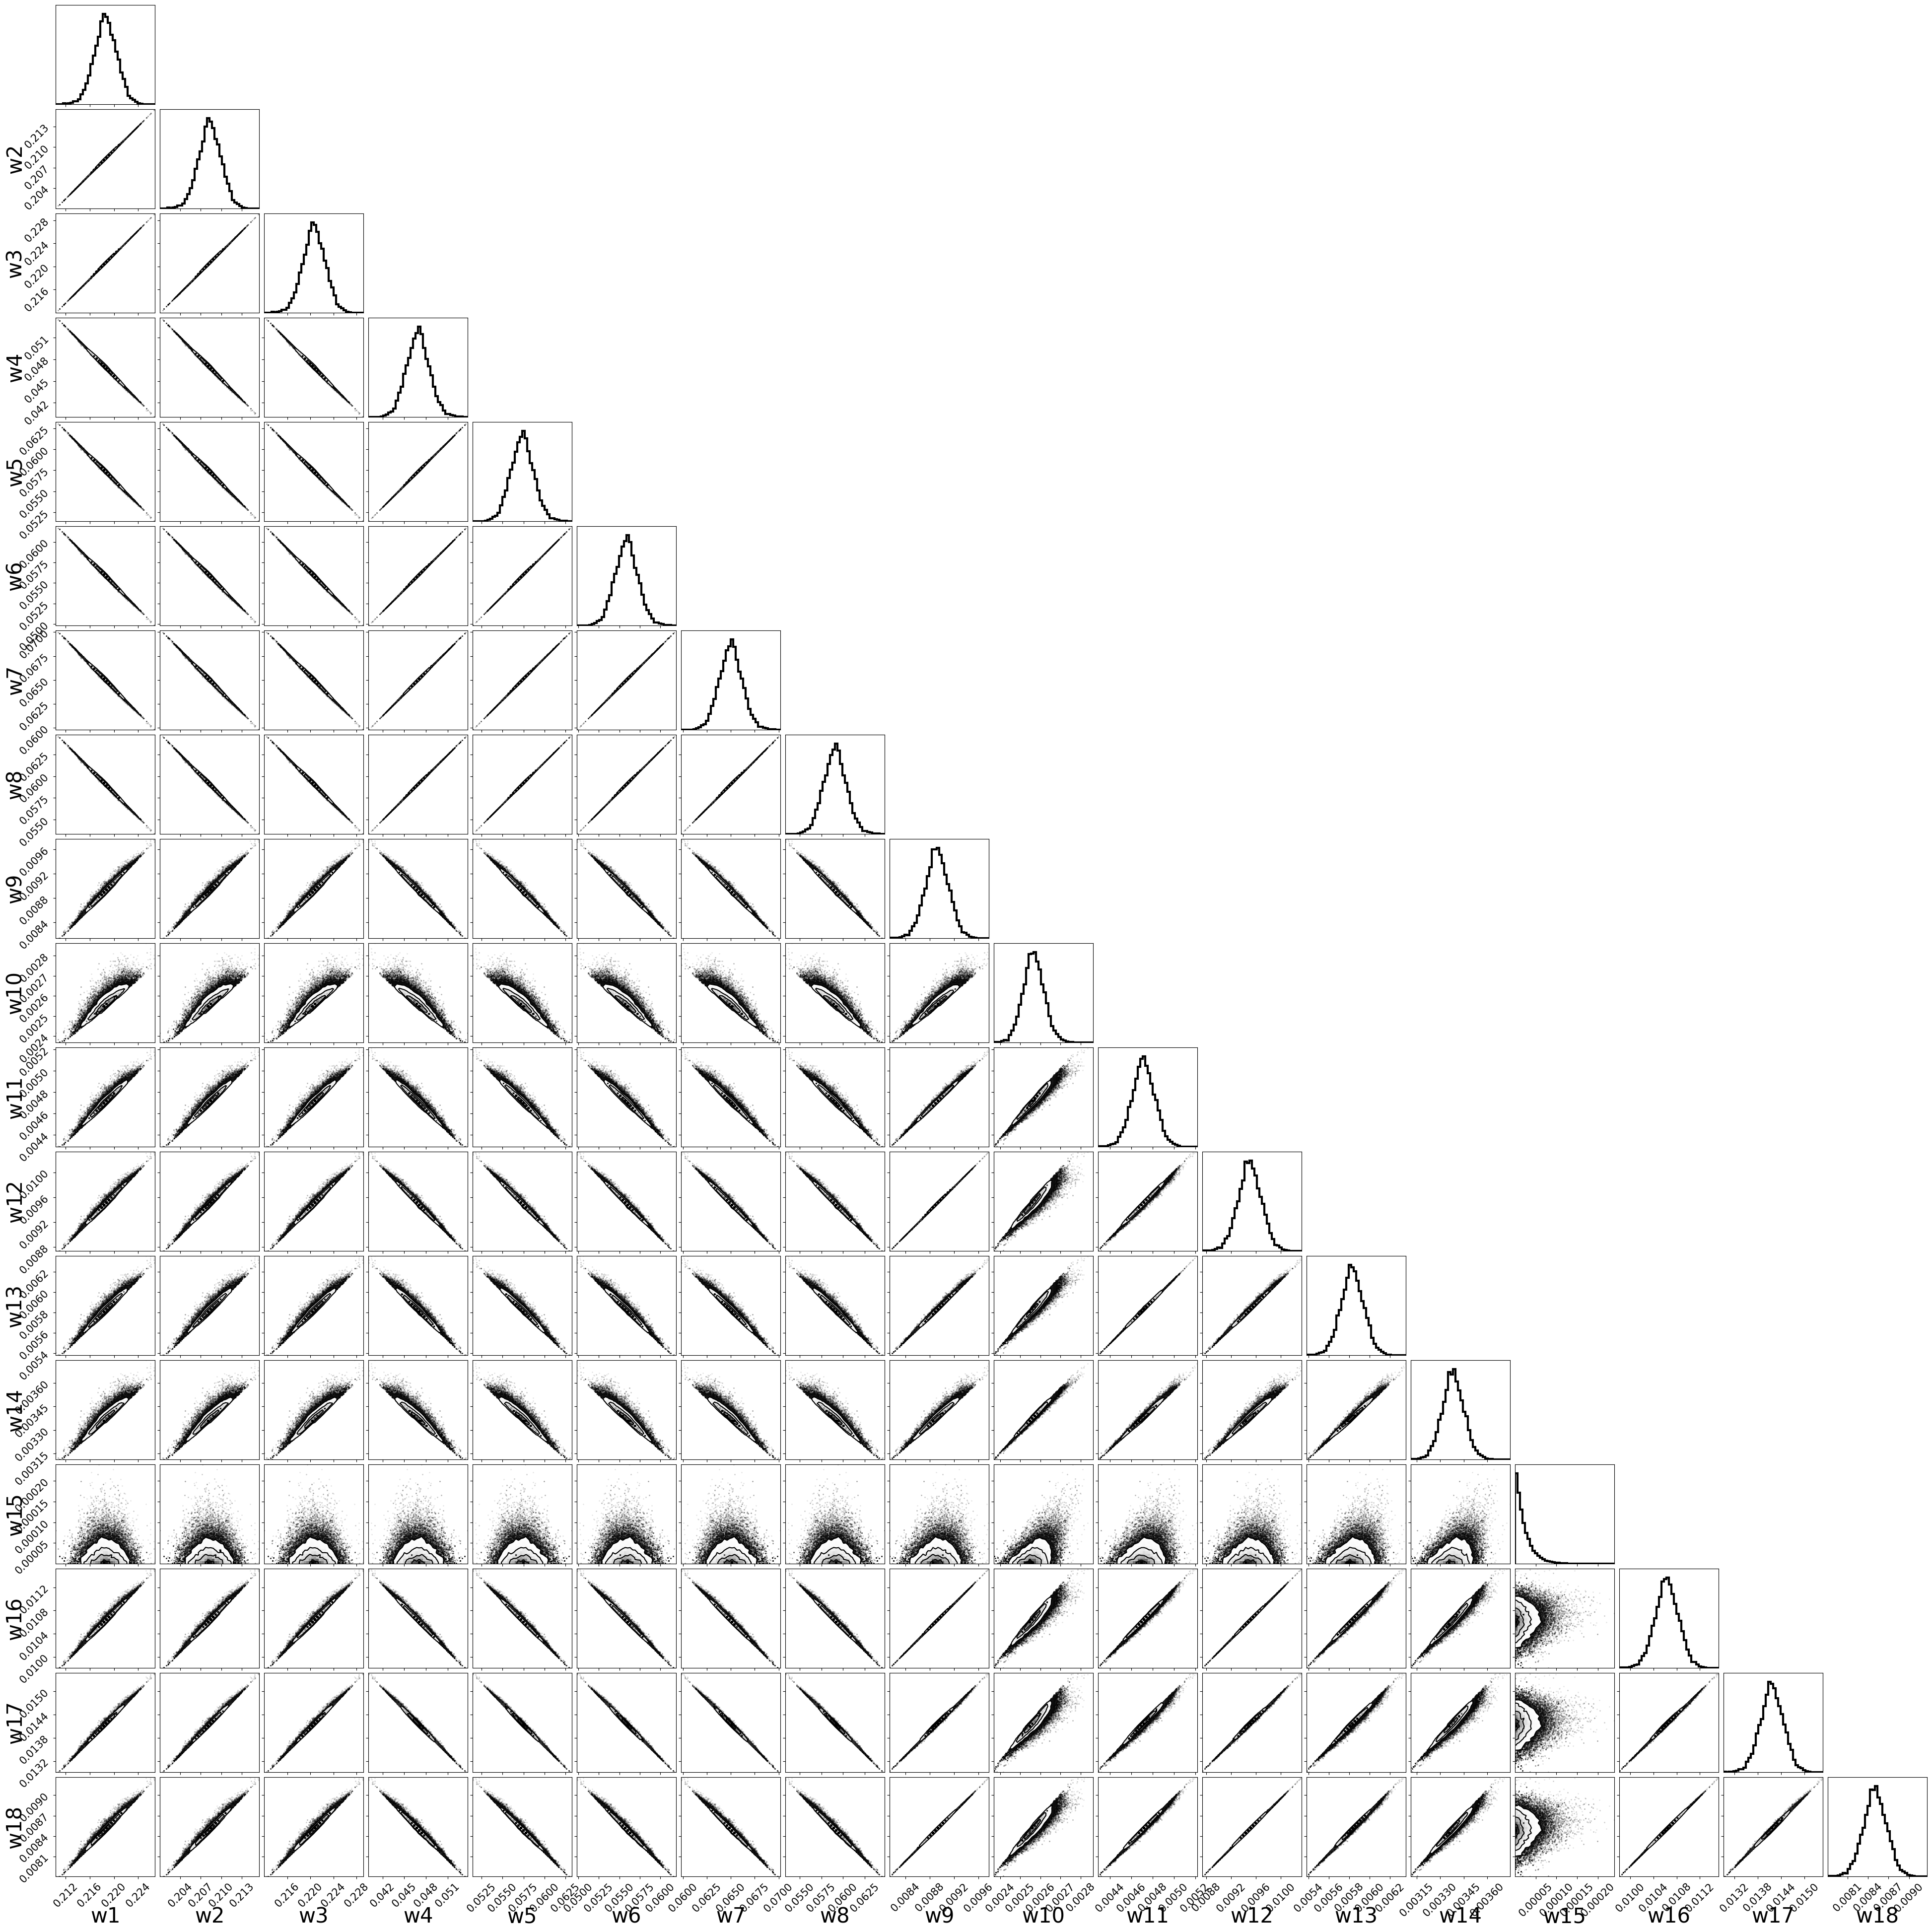

In [83]:
# # 4) Make a corner plot in the space of the naive models
samples_naive_space = np.array([np.dot(betaval,Vt_hat)  for  betaval in met_res[0]])


figure = corner.corner(samples_naive_space, bins=40, dpi=300, hist_kwargs={"linewidth": 3},labels=[f'w{i}' for i in range(1, len(Vt_hat.T) + 1)], truths=np.dot(beta,Vt_hat),label_kwargs={"fontsize": 30})
# figure = corner.corner(samples_naive_space)

plt.show()

In [531]:
[np.sum(samples_naive_space[i]) for i in range(len(samples_naive_space))]

[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999

In [314]:
met_res_unnorm=metropolis(y,0.5, log_prior_PC_unormalized,log_likelihood_PC_unormalized,\
               50000, np.array([1,0.1,0.1]),np.array([150,0.0,0.0]),Vt_hat,normalized=False)

37.291999999999994 %


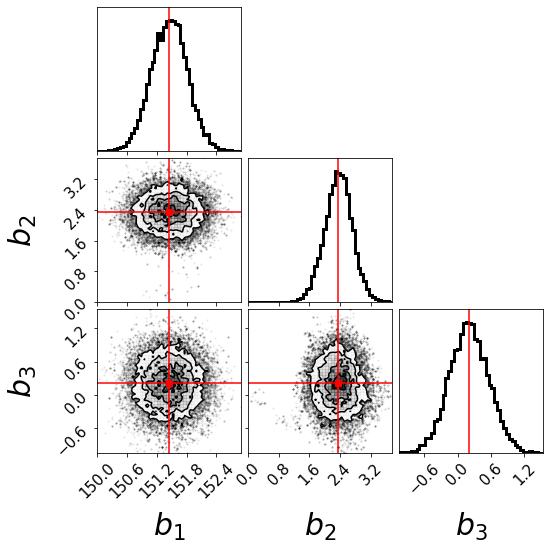

In [315]:
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)

figure = corner.corner(met_res_unnorm[0],bins=50, dpi=300, hist_kwargs={"linewidth": 3},
                       labels=[f'$b_{i}$' for i in range(1, len(beta) + 1)], truths=beta,truth_color="r",
                       label_kwargs={"fontsize": 30},labelpad=0.1)


plt.show()

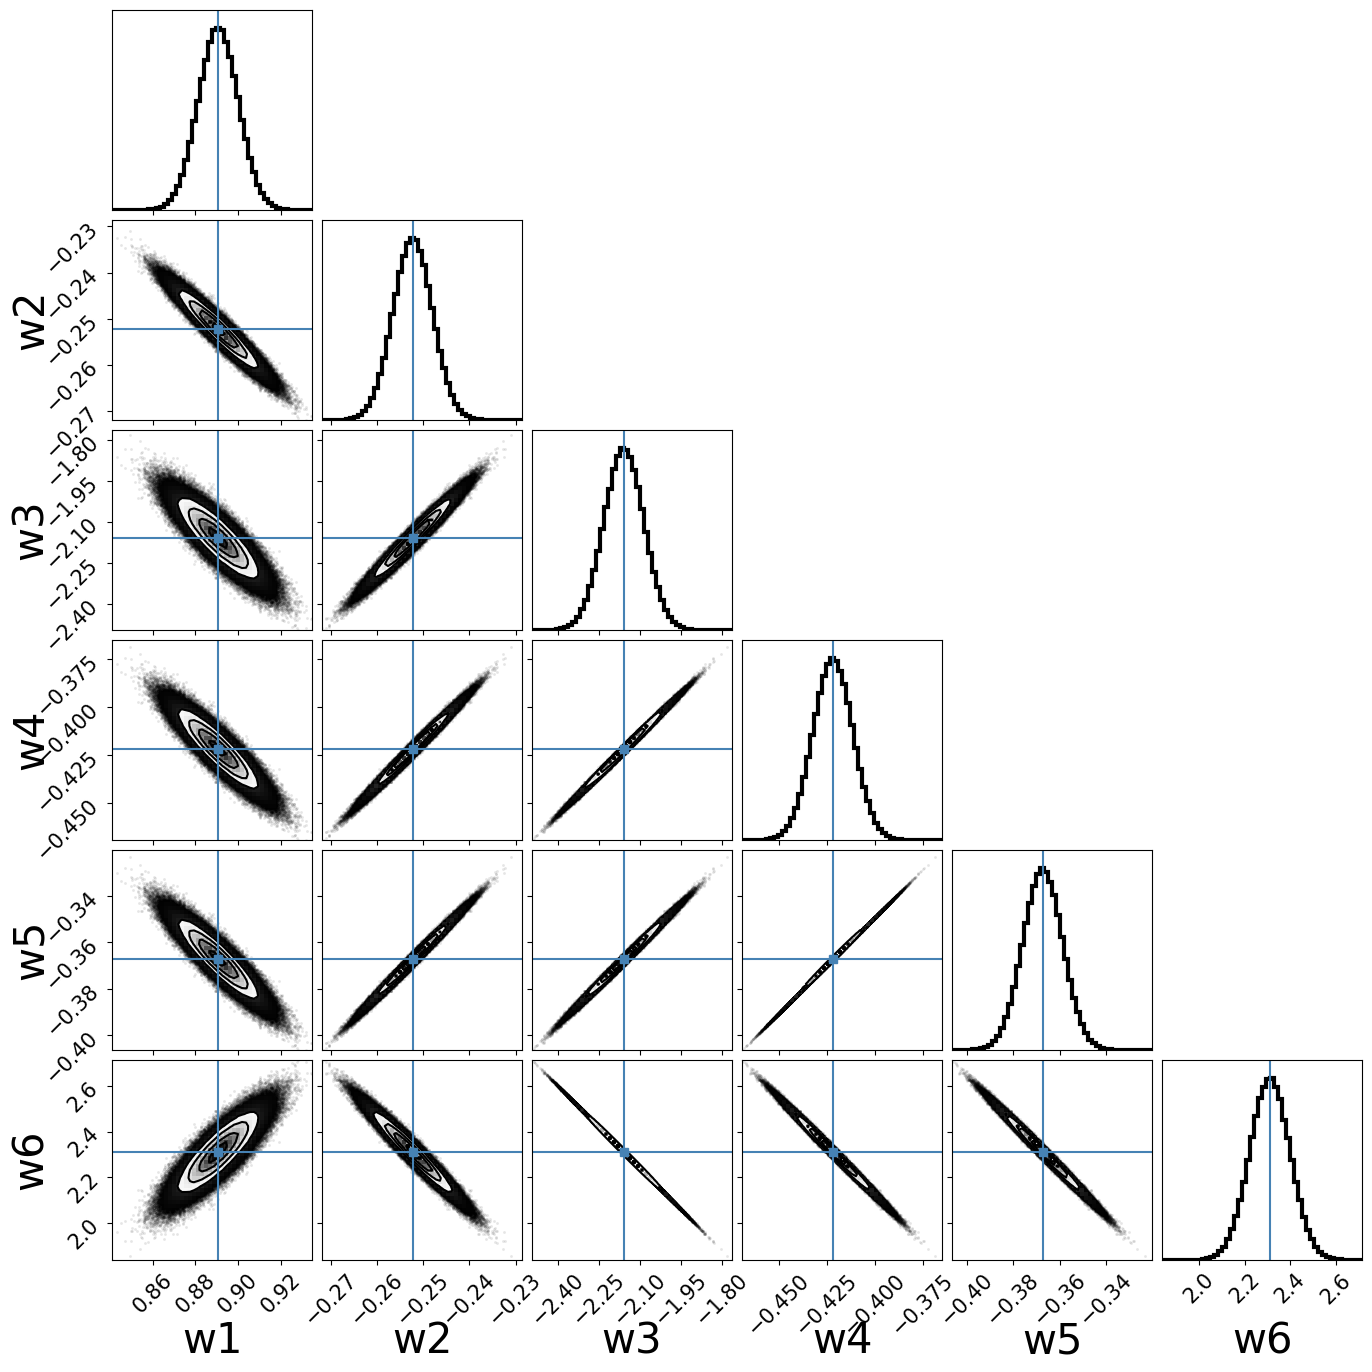

In [337]:
# # 4) Make a corner plot in the space of the naive models
samples_naive_space = np.array([np.dot(betaval,Vt_hat)  for  betaval in samples])


figure = corner.corner(samples_naive_space, bins=50, dpi=300, hist_kwargs={"linewidth": 3},labels=[f'w{i}' for i in range(1, len(Vt_hat.T) + 1)], truths=np.dot(beta,Vt_hat),label_kwargs={"fontsize": 30})
# figure = corner.corner(samples_naive_space)

plt.show()


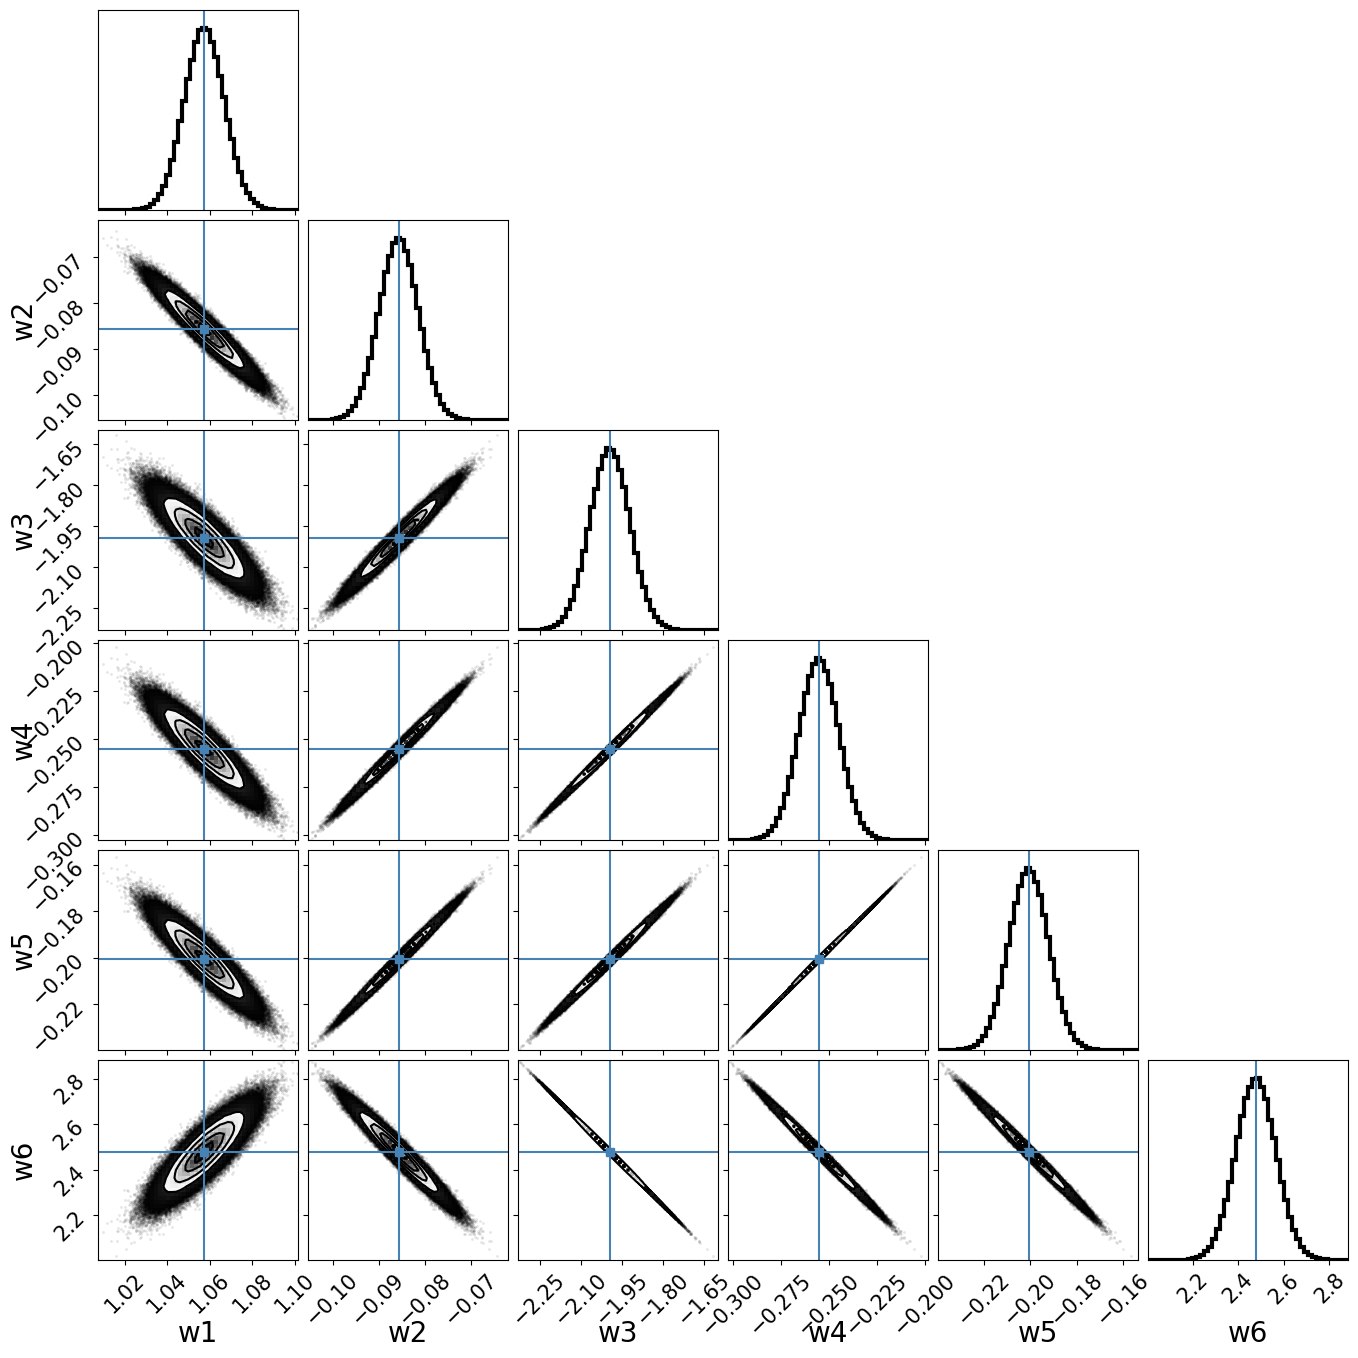

In [340]:
if centering_data:  #If we centered the data, to recover the correct weights we need to take into account the existence of P0

    # # 4) Make a corner plot in the space of the naive models
    samples_naive_space = np.array([np.dot(betaval,Vt_hat) + np.full(len(Vt_hat.T),1/len(Vt_hat.T)) for  betaval in samples])


    figure = corner.corner(samples_naive_space, bins=50, hist_kwargs={"linewidth": 3},labels=[f'w{i}' for i in range(1, len(Vt_hat.T) + 1)], truths=np.dot(beta,Vt_hat)+ np.full(len(Vt_hat.T),1/len(Vt_hat.T)),label_kwargs={"fontsize": 20})
    # figure = corner.corner(samples_naive_space)

    plt.show()


### Following the same procedure but using the full space of models (without PCA)

In [59]:
X_naive=np.copy(model_predictions_train).T
X_full_naive=np.copy(model_predictions).T
X_test_naive=np.copy(model_predictions_test).T
X_validation_naive=np.copy(model_predictions_validation).T

y_naive=np.copy(models_output_train["truth"].tolist())
y_naive_test=np.copy(models_output_test["truth"].tolist())
y_naive_validation=np.copy(models_output_validation["truth"].tolist())
y_naive_full=np.copy(models_output["truth"].tolist())



In [60]:
#Same process on the naive space of full models    

# 1) Find the least square solution for the training part
X_T_X_naive=X_naive.dot(X_naive.T)
X_T_X_inv_naive = np.linalg.inv(X_T_X_naive)
beta_naive = X_T_X_inv_naive.dot(X_naive).dot(y_naive)
supermodel_naive=X_naive.T.dot(beta_naive)

#1.5) Construct the super model across the entire range and the test range
supermodel_train_naive=np.copy(supermodel_naive)
supermodel_full_naive=X_full_naive.T.dot(beta_naive)
supermodel_test_naive=X_test_naive.T.dot(beta_naive)
supermodel_validation_naive=X_validation_naive.T.dot(beta_naive)


# 2) Construct the covariance matrix
residuals_naive = y_naive - supermodel_naive
sigma_squared_naive = np.sum(residuals_naive**2) / len(residuals_naive) 
# cov_matrix_naive = sigma_squared_naive * X_T_X_inv_naive
cov_matrix_naive = sigma_squared_naive * X_T_X_inv_naive

# 3) Make a corner plot
samples_naive = np.random.multivariate_normal(beta_naive, cov_matrix_naive, size=50000)


In [508]:
# figure = corner.corner(samples_naive, bins=50, dpi=300, hist_kwargs={"linewidth": 3},labels=[f'$w_{i}$' for i in range(1,1+len(beta_naive))], truths=beta_naive,label_kwargs={"fontsize": 30})
# # figure = corner.corner(samples_naive_space)

# plt.show()

In [61]:
beta_naive

array([ 0.29104221,  0.77177741, -0.08223886])

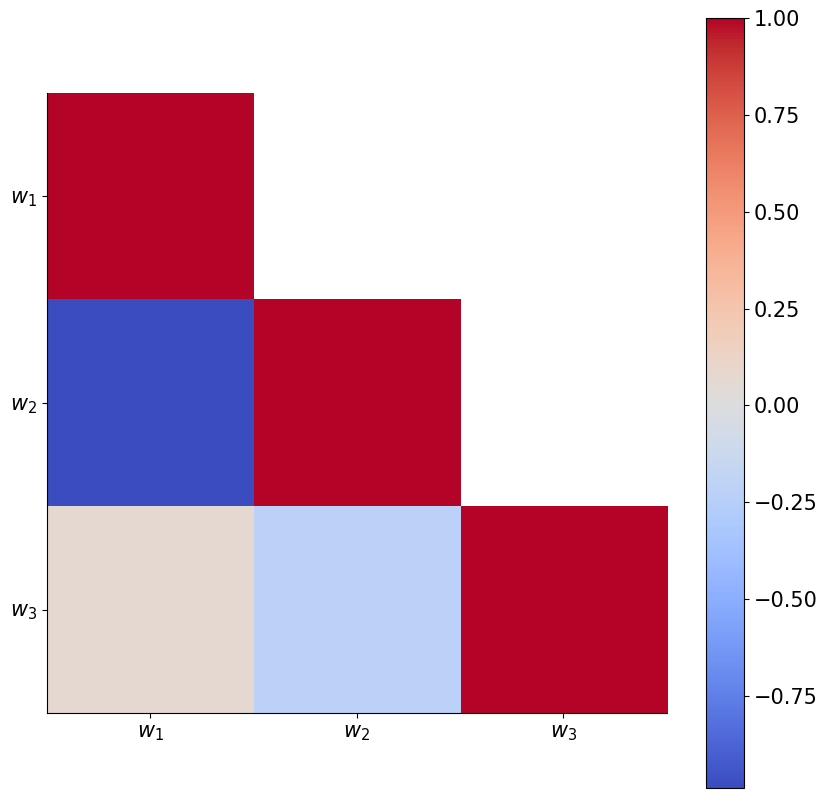

In [510]:
correlation_matrix_naive = cov_matrix_naive / np.sqrt(np.outer(np.diag(cov_matrix_naive), np.diag(cov_matrix_naive)))

mask = np.triu_indices_from(correlation_matrix_naive, k=1)
correlation_matrix_naive[mask] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap

# cax = ax.matshow(correlation_matrix_naive, cmap='coolwarm', vmin=0.99925, vmax=1)
cax = ax.matshow(correlation_matrix_naive, cmap='coolwarm')
# Add color bar
plt.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(correlation_matrix_naive)))
ax.set_yticks(np.arange(len(correlation_matrix_naive)))

plot_labels=[f"$w_{{{i}}}$" for i in range(1, len(correlation_matrix_naive) + 1)]
ax.set_xticklabels(plot_labels)
ax.set_yticklabels(plot_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.tick_bottom()

# Show the plot
plt.show()

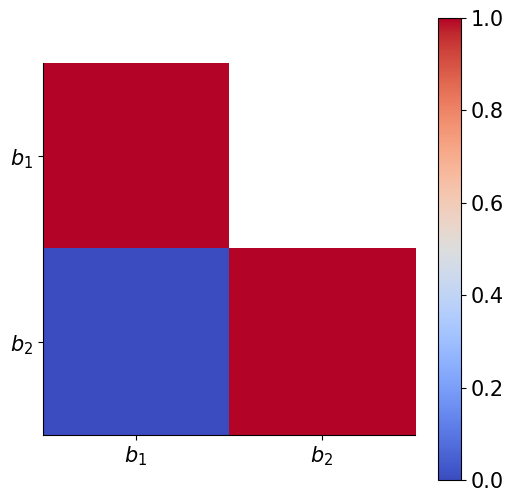

In [424]:
correlation_matrix = cov_matrix / np.sqrt(np.outer(np.diag(cov_matrix), np.diag(cov_matrix)))

mask = np.triu_indices_from(correlation_matrix, k=1)
correlation_matrix[mask] = np.nan

fig, ax = plt.subplots(figsize=(6, 6))

# Create the heatmap

# cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
# Add color bar
plt.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(correlation_matrix)))
ax.set_yticks(np.arange(len(correlation_matrix)))

plot_labels=[f"$b_{i}$" for i in range(1, len(correlation_matrix) + 1)]

ax.set_xticklabels(plot_labels)
ax.set_yticklabels(plot_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.tick_bottom()

# Show the plot
plt.show()

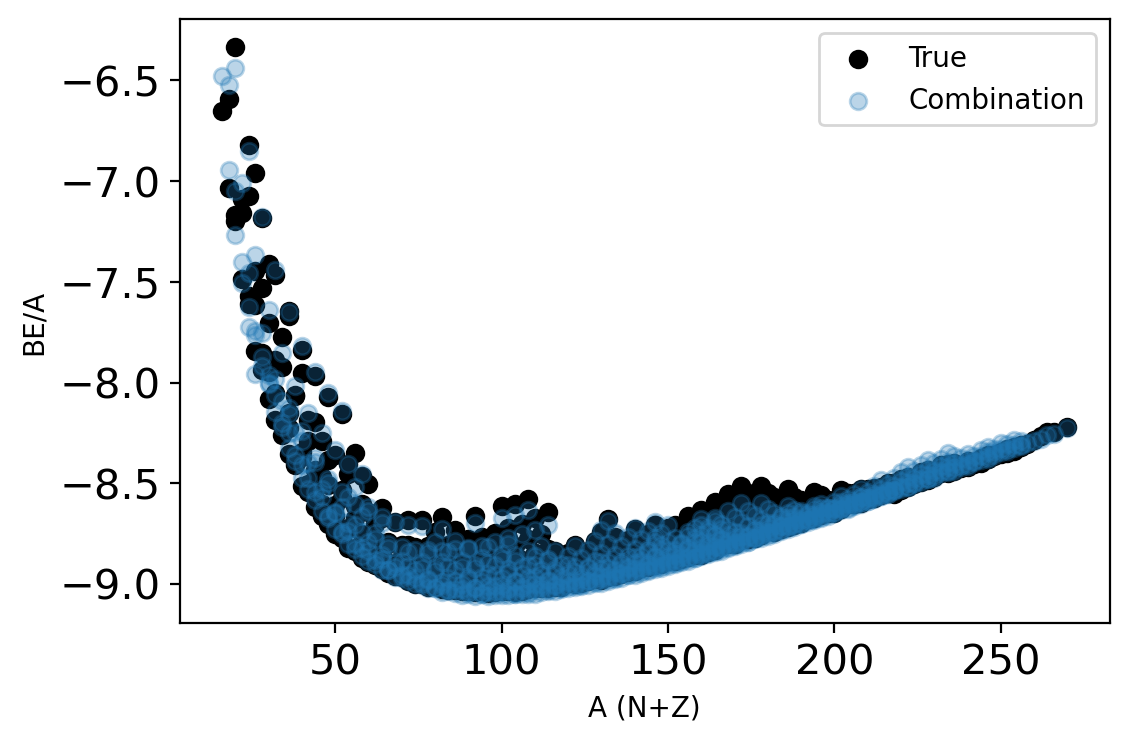

In [532]:
fig = plt.subplots(dpi=200)

plt.scatter(x = models_output["A"], y = models_output['truth'], label = str("True"), color='k')




plt.scatter(x = models_output["A"], y = supermodel_full, label = str("Combination"), alpha = 0.3)


plt.legend()

plt.xlabel('A (N+Z)')

plt.ylabel('BE/A')

plt.show()

In [104]:
#Restricting the super model to plot on the selected isotope 
X_full_filtered=[]

for i in range(len(X_full)):
    X_full_filtered.append(X_full[i][filtered_models_output.index])
X_full_filtered=np.array(X_full_filtered)

In [105]:
rng = np.random.default_rng()
theta_rand = rng.choice(samples, (50000), replace=False)
appropiate_sigma=sigma_squared

# theta_rand = rng.choice(met_res[0], (50000), replace=False)
# appropiate_sigma=emp_sigma**2

rndm_m = []

for i in range(len(theta_rand)):
    if centering_data:
        yvals_rand= X_full_filtered.T.dot(np.insert(theta_rand[i], 0, 1))
    else:
        yvals_rand= X_full_filtered.T.dot(theta_rand[i])

    rndm_m.append(yvals_rand +
                   np.random.multivariate_normal(np.full(
                       len(yvals_rand)
                       ,0), np.diag(1.0 * np.full(len(yvals_rand),1.0 * appropiate_sigma ) )))   

In [372]:
#Restricting the full naive model to the isotopes we want
model_predictions_filtered=[]

for i in range(len(model_predictions.T)):
    model_predictions_filtered.append(model_predictions.T[i][filtered_models_output.index])
model_predictions_filtered=np.array(model_predictions_filtered)

In [374]:
rndm_m_naive=[]

for i in range(len(samples_naive)):

    yvals_rand= model_predictions_filtered.T.dot(samples_naive[i])

    rndm_m_naive.append(yvals_rand +
                   np.random.multivariate_normal(np.full(
                       len(yvals_rand)
                       ,0), np.diag(1.0 * np.full(len(yvals_rand),1.0 * sigma_squared_naive ) )))   

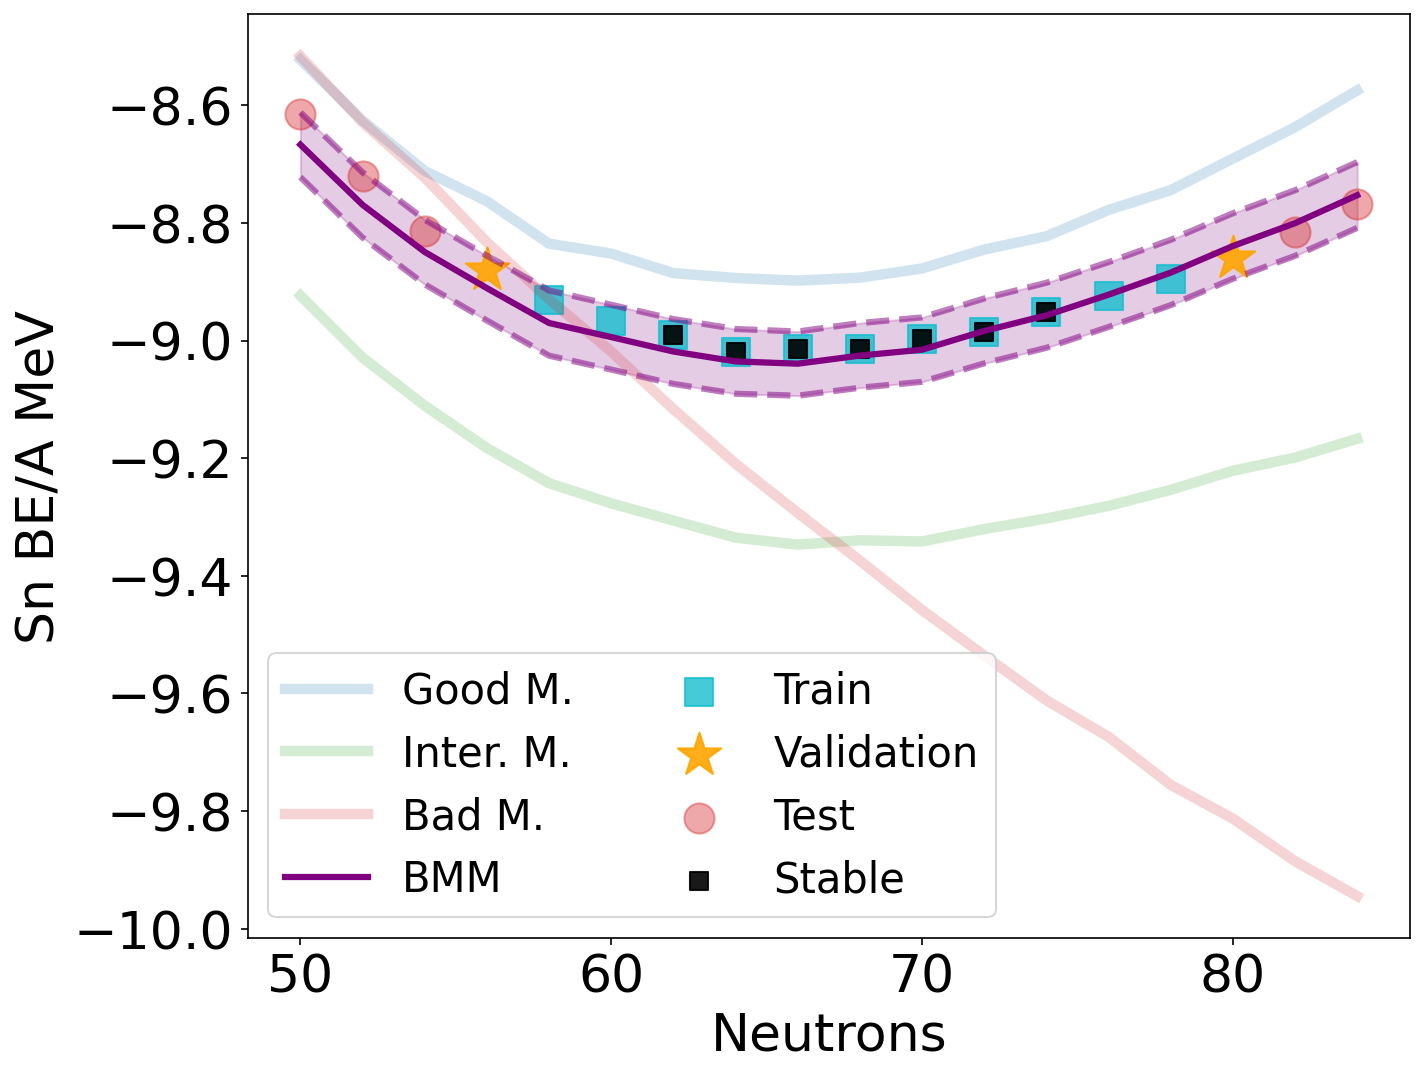

In [106]:
plt.rc("xtick", labelsize=25)
plt.rc("ytick", labelsize=25)

fig, ax = plt.subplots(figsize=(10,8), dpi=150)
# fig, ax = plt.subplots(dpi=200)

alpha_models=0.2

model_index=0
class_index=0
for n_vals in n_classes:
    legend_flag=0
    for i in range(n_vals):
        if legend_flag==0:
            legend_flag=1
            ax.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], label = n_Labels[class_index], color=colors[class_index],alpha = alpha_models,linewidth=5)
           
        else:
            ax.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], color=colors[class_index],alpha = alpha_models,linewidth=5)
        model_index=model_index+1
    class_index=class_index+1
    legend_flag=0



#Select what to plot, either the super model or the naive version


name="BMM-PC"
samples_plot=np.copy(rndm_m)



# name="BMM-0"
# samples_plot=np.copy(rndm_m_naive)



mean = np.mean(samples_plot,axis=0)
upper = (np.percentile(samples_plot, 97.5, axis=0))

lower = (np.percentile(samples_plot, 2.5, axis=0))

plt.plot(filtered_models_output["N"], mean, color="purple", label='BMM',linewidth=3)

plt.plot(filtered_models_output["N"], lower, color="purple",linestyle="dashed",linewidth=3,alpha=0.5)
plt.plot(filtered_models_output["N"], upper, color="purple",linestyle="dashed",linewidth=3,alpha=0.5)

plt.fill_between(filtered_models_output["N"], lower, upper, color="purple",alpha=0.2)




# ax.scatter(x = filtered_models_output_train["N"], y = filtered_models_output_train['truth'], label = "Truth (Train)",color='k',s=200)

# ax.scatter(x = filtered_models_output_test["N"], y = filtered_models_output_test['truth'],
#             label = "Truth (Test)",color='orange',s=400,marker="*",edgecolor='face', linewidth=1.5,alpha=1)


# ax.scatter(x = filtered_models_output_test["N"], y = filtered_models_output_test['truth'],
#             label = "Truth (Test)",color='orange',s=400,marker="*",edgecolor='face', linewidth=1.5,alpha=1)


size_multiplyier=6

ax.scatter(x = filtered_models_output_train["N"], y = filtered_models_output_train['truth'], label = "Train",  alpha = alpha_trainig,color=color_trainig,s=size_trainig*size_multiplyier,marker=marker_trainig)

ax.scatter(x = filtered_models_output_validation["N"], y = filtered_models_output_validation['truth'], label = "Validation", alpha=alpha_validation ,color=color_validation,s=size_validation*size_multiplyier,marker=marker_validation)

ax.scatter(x = filtered_models_output_test["N"], y = filtered_models_output_test['truth'], label = "Test", alpha = alpha_testing,color=color_testing,s=size_testing*size_multiplyier,marker=marker_testing)

ax.scatter(x = filtered_models_output_stable["N"], y = filtered_models_output_stable['truth'], label = "Stable", alpha = 0.9,color='k',s=80,marker="s")





plt.xlabel("Neutrons",fontsize=25)
plt.ylabel(Selected_element_name+ " BE/A MeV",fontsize=25)
plt.legend(fontsize=20,markerscale=1,ncol=2 )

plt.show()

In [376]:
super_model_resituals_train=supermodel_train  -  models_output_train['truth'].tolist()
super_model_residuals_validation= supermodel_validation-models_output_validation['truth'].tolist()
super_model_residuals_test = supermodel_test-models_output_test['truth'].tolist()



naive_model_resituals_train=supermodel_train_naive-models_output_train['truth'].tolist()
naive_model_residuals_validation= supermodel_validation_naive-models_output_validation['truth'].tolist()
naive_model_residuals_test = supermodel_test_naive-models_output_test['truth'].tolist()





In [377]:
sigma_train=np.sqrt(np.sum(super_model_resituals_train**2) / len(super_model_resituals_train) )
sigma_validation=np.sqrt(np.sum(super_model_residuals_validation**2) / len(super_model_residuals_validation) )
sigma_test=np.sqrt(np.sum(super_model_residuals_test**2) / len(super_model_residuals_test) )


sigma_naive_train=np.sqrt(np.sum(naive_model_resituals_train**2) / len(naive_model_resituals_train) )
sigma_naive_validation=np.sqrt(np.sum(naive_model_residuals_validation**2) / len(naive_model_residuals_validation) )
sigma_naive_test=np.sqrt(np.sum(naive_model_residuals_test**2) / len(naive_model_residuals_test) )



In [378]:
[sigma_train,sigma_validation,sigma_test]

[0.021981239595703243, 0.027315101464476597, 0.030223403682441117]

In [74]:
[sigma_naive_train,sigma_naive_validation,sigma_naive_test]

[0.018775910426785176, 0.03113299518350352, 0.045970521419004706]

In [75]:
model_summary

{'rmse_all': array([0.14871625, 0.10145449, 0.19722845, 0.35759095, 0.27295053,
        0.26834887, 0.31142221, 0.3186881 , 0.61133081, 0.58278209,
        0.60866348, 0.60491996, 0.6395405 , 0.59432596, 0.63431753,
        0.64298726, 0.58795561, 0.62144331]),
 'rmse_train': array([0.14372172, 0.09379726, 0.19613915, 0.31570488, 0.228735  ,
        0.22358085, 0.26933735, 0.27622013, 0.53375   , 0.50608775,
        0.53070528, 0.52812714, 0.56080141, 0.51679518, 0.55570112,
        0.56571002, 0.51229721, 0.54387816]),
 'rmse_validation': array([0.17197863, 0.12410186, 0.22238358, 0.35417557, 0.26904985,
        0.2641718 , 0.30608049, 0.31329082, 0.58098693, 0.55385093,
        0.57813816, 0.57403925, 0.60744693, 0.56433255, 0.60292045,
        0.6103899 , 0.55731583, 0.58966641]),
 'rmse_test': array([0.14757681, 0.10300372, 0.19133212, 0.39965961, 0.31561359,
        0.31140533, 0.35341851, 0.36114248, 0.69393579, 0.66385016,
        0.69158569, 0.68686785, 0.72396473, 0.67652998, 

In [76]:
list(models_output.keys())

['GoodModel_0',
 'GoodModel_1',
 'GoodModel_2',
 'IntermediateModel_0',
 'IntermediateModel_1',
 'IntermediateModel_2',
 'IntermediateModel_3',
 'IntermediateModel_4',
 'BadModel_0',
 'BadModel_1',
 'BadModel_2',
 'BadModel_3',
 'BadModel_4',
 'BadModel_5',
 'BadModel_6',
 'BadModel_7',
 'BadModel_8',
 'BadModel_9',
 'truth',
 'N',
 'Z',
 'A']

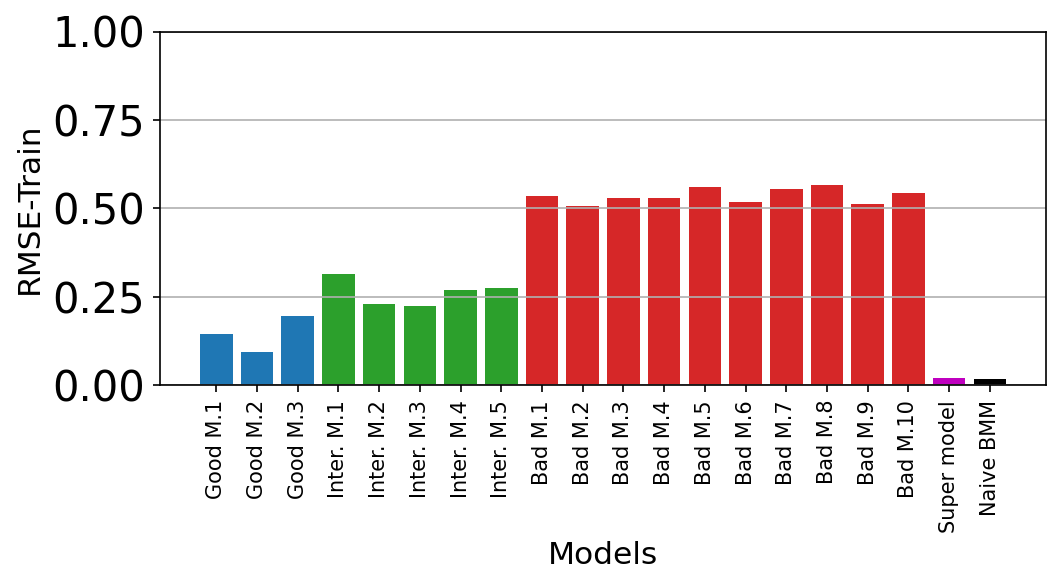

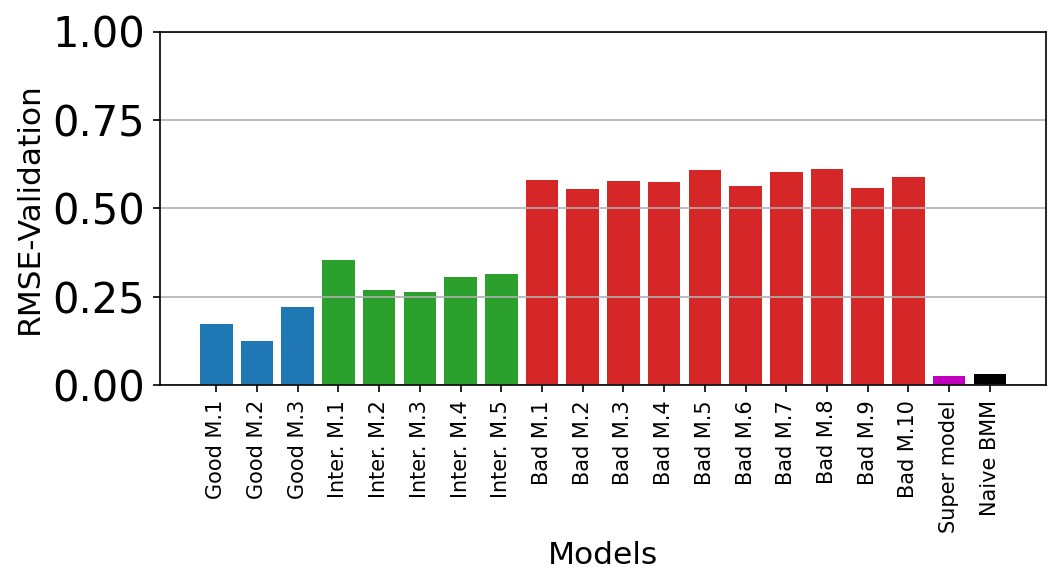

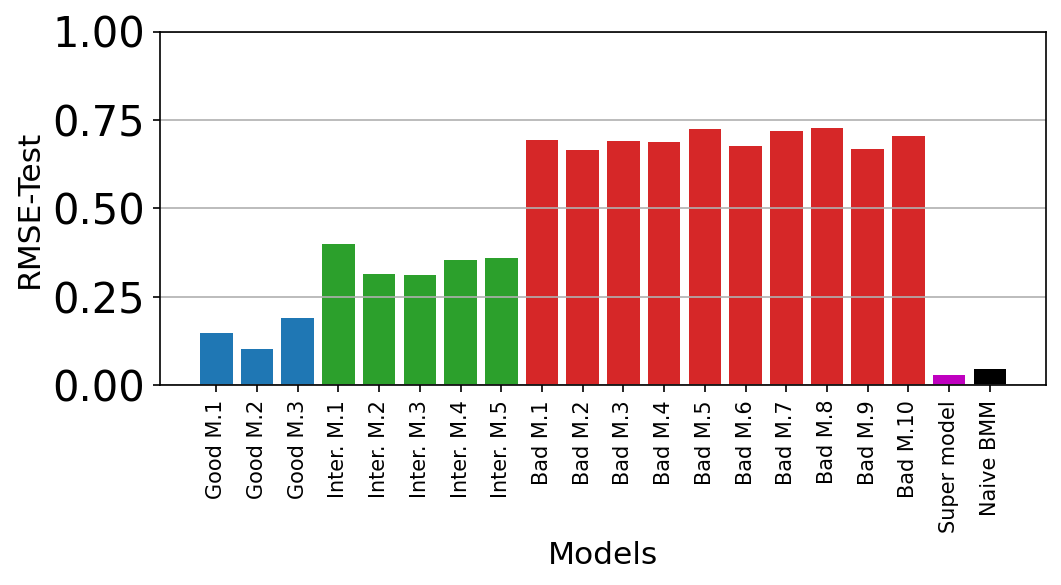

In [77]:
y_max=1

plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)


################################

# Training round

labels=list(models_output.keys())
plt.figure(figsize=(7, 4),dpi=150)
# plt.figure(dpi=150)

rmse_train=[]


model_index=0
class_index=0
for n_vals in n_classes:
    rmse_av=0
    for i in range(n_vals):
        
        # ax.plot(filtered_models_output["N"], filtered_models_output[key_list[model_index]], 
        #         label = n_Labels[class_index], color=colors[class_index],alpha = alpha_models,linewidth=5)
        plt.bar(n_Labels[class_index] + str(i+1) , model_summary["rmse_train"][model_index], color=colors[class_index])
        rmse_av=rmse_av+model_summary["rmse_train"][model_index]
        model_index=model_index+1
    if n_vals!=0:
        rmse_train.append(rmse_av/n_vals)
    class_index=class_index+1


plt.bar('Super model' , sigma_train, color='m')
plt.bar('Naive BMM' , sigma_naive_train, color='k')

plt.xlabel('Models',fontsize=15)
plt.ylabel('RMSE-Train',fontsize=15)
plt.ylim(0,y_max)
plt.xticks(fontsize=10,rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

################################

# Validation round

labels=list(models_output.keys())
plt.figure(figsize=(7, 4),dpi=150)
# plt.figure(dpi=150)

rmse_validation=[]


model_index=0
class_index=0
for n_vals in n_classes:
    rmse_av=0
    for i in range(n_vals):
        
        plt.bar(n_Labels[class_index] + str(i+1) , model_summary["rmse_validation"][model_index], color=colors[class_index])
        rmse_av=rmse_av+model_summary["rmse_validation"][model_index]
        model_index=model_index+1
    if n_vals!=0:
        rmse_validation.append(rmse_av/n_vals)
    class_index=class_index+1


plt.bar('Super model' , sigma_validation, color='m')

plt.bar('Naive BMM' , sigma_naive_validation, color='k')

plt.xlabel('Models',fontsize=15)
plt.ylabel('RMSE-Validation',fontsize=15)
plt.ylim(0,y_max)
plt.xticks(fontsize=10,rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

################################

# Testing round

labels=list(models_output.keys())
plt.figure(figsize=(7, 4),dpi=150)
# plt.figure(dpi=150)

rmse_test=[]


model_index=0
class_index=0
for n_vals in n_classes:
    rmse_av=0
    for i in range(n_vals):
        
        plt.bar(n_Labels[class_index] + str(i+1) , model_summary["rmse_test"][model_index], color=colors[class_index])
        rmse_av=rmse_av+model_summary["rmse_test"][model_index]
        model_index=model_index+1
    if n_vals!=0:
        rmse_test.append(rmse_av/n_vals)
    class_index=class_index+1


plt.bar('Super model' , sigma_test, color='m')
plt.bar('Naive BMM' , sigma_naive_test, color='k')

plt.xlabel('Models',fontsize=15)
plt.ylabel('RMSE-Test',fontsize=15)
plt.ylim(0,y_max)
plt.xticks(fontsize=10,rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

################################

# Everything round

In [78]:
def PC_RMSE_calculator(components_kept):  #A function that will basically run everything above (without the plots) with varying number of kept PCs




    S_hat=np.array([S[i] for i in range(components_kept)])

    # U_hat=np.array([U.T[i]*S_hat[i] for i in range(components_kept)])
    U_hat=np.array([U.T[i]*np.linalg.norm(predictions_train_mean) for i in range(components_kept)])

    # Vt_hat=np.array([Vt[i] for i in range(components_kept)])
    Vt_hat=np.array([Vt[i]/S_hat[i]*np.linalg.norm(predictions_train_mean) for i in range(components_kept)])   


    if centering_data:
        num_components=components_kept+1
    else:
        num_components=components_kept



    #########################################
    #Creating principal components that are for training. These should be equivalent to \hat U, and if they are not there is something wrong
    models_PC_train = {}
    if centering_data:
        models_PC_train[str("PC_0")] = predictions_train_mean       
    for i in range(components_kept):
        models_PC_train[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_train.T)
    models_PC_train["N"] = models_output_train["N"]
    models_PC_train["Z"] = models_output_train["Z"]
    models_PC_train["A"] = models_PC_train["N"] + models_PC_train["Z"]
    models_PC_training = pd.DataFrame(models_PC_train)
    #########################################

    #########################################
    #Creating principal components that are for validation
    models_PC_validation = {}
    if centering_data:
        models_PC_validation[str("PC_0")] = predictions_validation_mean
    for i in range(components_kept):
        models_PC_validation[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_validation.T)
    models_PC_validation["N"] = models_output_validation["N"]
    models_PC_validation["Z"] = models_output_validation["Z"]
    models_PC_validation["A"] = models_PC_validation["N"] + models_PC_validation["Z"]
    models_PC_validation = pd.DataFrame(models_PC_validation)
    #########################################

    #########################################
    #Creating principal components that are for testing
    models_PC_testing = {}
    if centering_data:
        models_PC_testing[str("PC_0")] = predictions_test_mean
    for i in range(components_kept):
        # models_PC_testing[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_test.T)*S_hat[i]
        models_PC_testing[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions_test.T)

    models_PC_testing["N"] = models_output_test["N"]
    models_PC_testing["Z"] = models_output_test["Z"]
    models_PC_testing["A"] = models_PC_testing["N"] + models_PC_testing["Z"]
    models_PC_testing = pd.DataFrame(models_PC_testing)
    #########################################

    #Creating principal components that are valid everywhere (testing + training + validation)
    models_PC = {}
    if centering_data:
        models_PC[str("PC_0")] = predictions_mean
    for i in range(components_kept):
        models_PC[str("PC_")+str(i+1)] = np.dot(Vt_hat[i],model_predictions.T)
    models_PC = pd.DataFrame(models_PC)
    models_PC["N"] = Full_set.T[0]
    models_PC["Z"] = Full_set.T[1]
    models_PC["A"] = models_PC["N"] + models_PC["Z"]
    #########################################

    key_list_PCs=list(models_PC_testing.keys())


    X=np.copy(U_hat)
    if centering_data:
        y=np.copy(models_output_train["truth"].tolist())-predictions_train_mean
    else:
        y=np.copy(models_output_train["truth"].tolist())
    #Making the list of principal components across the train part. These should be identical to the X on top made by \hat U
    X_train=[]
    for i in range(num_components):
        X_train.append(models_PC_train[key_list_PCs[i]].tolist())
    X_train=np.array(X_train)
    #Making the list of principal components across the validation part
    X_validation=[]
    for i in range(num_components):
        X_validation.append(models_PC_validation[key_list_PCs[i]].tolist())
    X_validation=np.array(X_validation)

    #Making the list of principal components across the testing part
    X_test=[]
    for i in range(num_components):
        X_test.append(models_PC_testing[key_list_PCs[i]].tolist())
    X_test=np.array(X_test)
    #Making the list of principal components across the entire chart (training+validation+testing)
    X_full=[]
    for i in range(num_components):
        X_full.append(models_PC[key_list_PCs[i]].tolist())
    X_full=np.array(X_full)

    

    # 1) Find the least square solution for the training part
    X_T_X_inv = np.linalg.inv(X.dot(X.T))
    beta = X_T_X_inv.dot(X).dot(y)
    
    #1.5) Construct the super model across the entire range and the test range
    if centering_data:
        beta_full= np.insert(beta, 0, 1)  #Augmenting the beta list to add a "1" at the begining so it can use the PC0 (the mean)
    else:
        beta_full=np.copy(beta)

    # supermodel=X.T.dot(beta_full)
    supermodel=X_train.T.dot(beta_full)
    supermodel_train=np.copy(supermodel)
    supermodel_validation=X_validation.T.dot(beta_full)
    supermodel_test=X_test.T.dot(beta_full)
    supermodel_full=X_full.T.dot(beta_full)

    
    super_model_resituals_train=supermodel_train-models_output_train['truth'].tolist()
    super_model_residuals_validation= supermodel_validation-models_output_validation['truth'].tolist()
    super_model_residuals_test = supermodel_test-models_output_test['truth'].tolist()
    super_model_residuals_full = supermodel_full-models_output['truth'].tolist()

    sigma_train=np.sqrt(np.sum(super_model_resituals_train**2) / len(super_model_resituals_train) )
    sigma_validation=np.sqrt(np.sum(super_model_residuals_validation**2) / len(super_model_residuals_validation) )
    sigma_test=np.sqrt(np.sum(super_model_residuals_test**2) / len(super_model_residuals_test) )
    sigma_full=np.sqrt(np.sum(super_model_residuals_full**2) / len(super_model_residuals_full) )


    return [sigma_train,sigma_validation,sigma_test,sigma_full]

In [79]:
if centering_data:
    s_validation=[np.linalg.norm(np.array(models_output_validation["truth"].tolist())-predictions_validation_mean)/np.sqrt(len(predictions_validation_mean))]
    s_test=[np.linalg.norm(np.array(models_output_test["truth"].tolist())-predictions_test_mean)/np.sqrt(len(predictions_test_mean))]
    s_train=[np.linalg.norm(np.array(models_output_train["truth"].tolist())-predictions_train_mean)/np.sqrt(len(predictions_train_mean))]
    s_all=[np.linalg.norm(np.array(models_output["truth"].tolist())-predictions_mean)/np.sqrt(len(predictions_mean))]
    
else:
    s_test=[]
    s_train=[]
    s_validation=[]
    s_all=[]

for i in range(1,len(S)):
    res=PC_RMSE_calculator(i)
    s_train.append(res[0])
    s_validation.append(res[1])
    s_test.append(res[2])
    
    s_all.append(res[3])

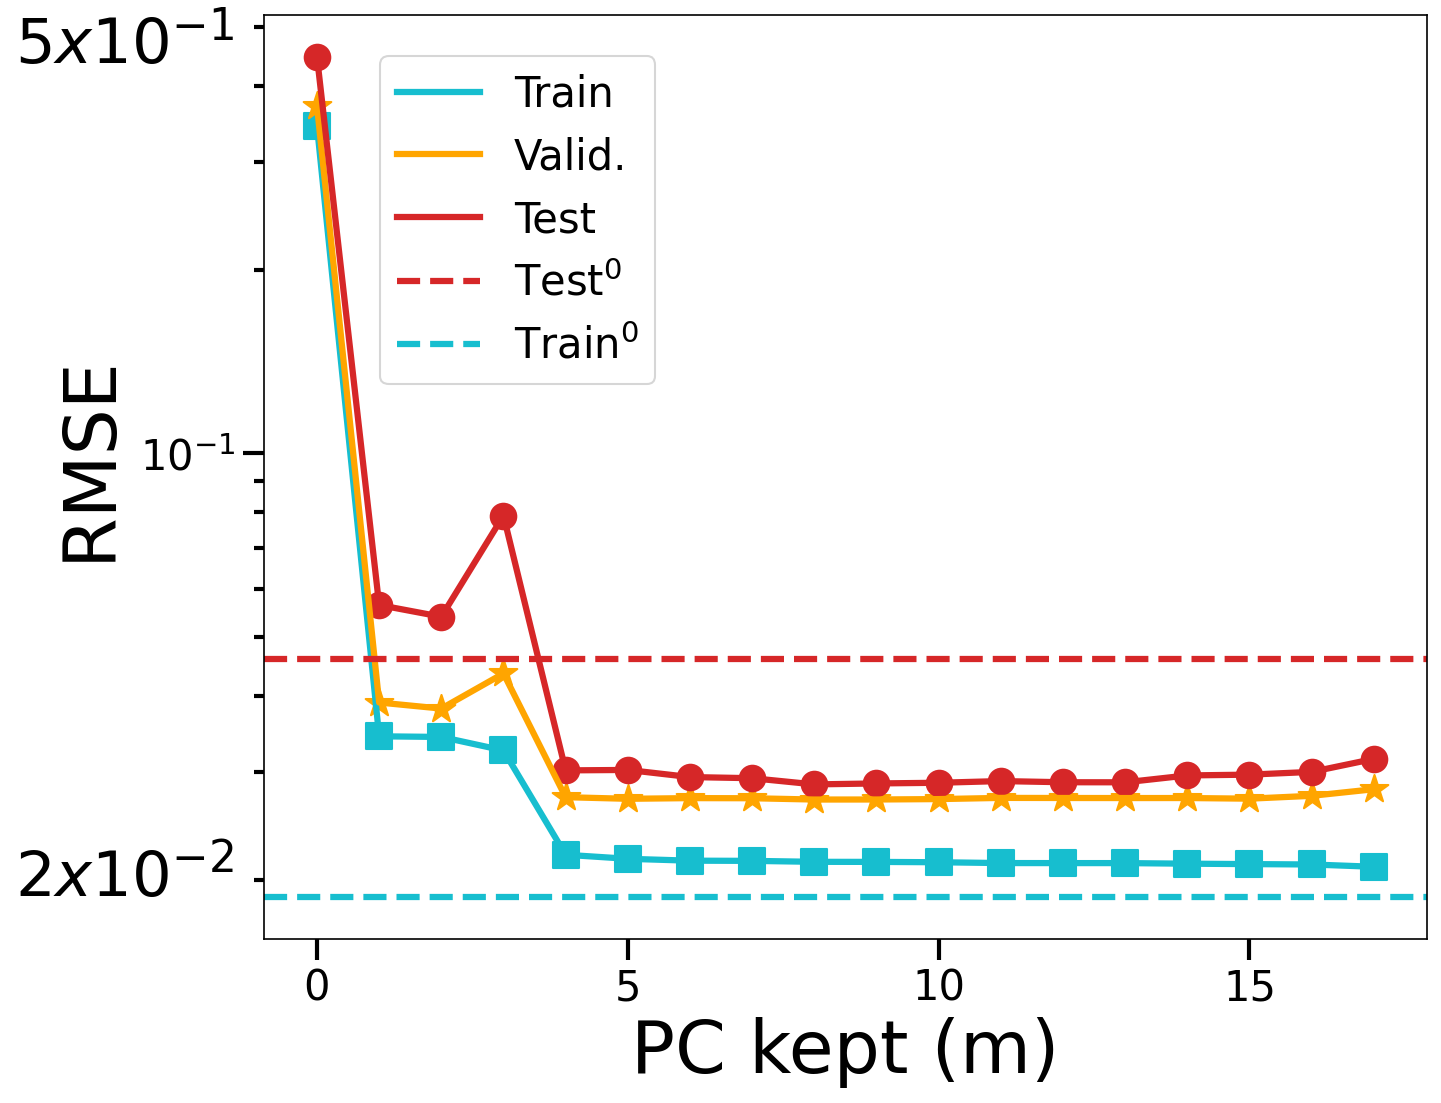

In [80]:
# plt.rc("xtick", labelsize=30)
# plt.rc("ytick", labelsize=30)


fig, ax = plt.subplots(figsize=(10,8),dpi=150)
fig.patch.set_facecolor('white')


# color_trainig=colors[9]
# color_validation='orange'
# color_testing=colors[3]

# marker_trainig='s'
# marker_validation='*'
# marker_testing='o'



# size_trainig=30
# size_validation=80
# size_testing=35

# alpha_trainig=0.8
# alpha_validation=0.9
# alpha_testing=0.4



size_points=150



ax.scatter(np.arange(0,len(s_train)), s_train,color=color_trainig,s=size_points,marker=marker_trainig)
ax.plot(np.arange(0,len(s_train)), s_train,color=color_trainig,linewidth=3,label="Train")

ax.scatter(np.arange(0,len(s_validation)), s_validation,color=color_validation,s=size_points*1.3,marker=marker_validation)
ax.plot(np.arange(0,len(s_validation)), s_validation,color=color_validation,linewidth=3,label="Valid.")


ax.scatter(np.arange(0,len(s_test)), s_test,color=color_testing,s=size_points,marker=marker_testing)
ax.plot(np.arange(0,len(s_test)), s_test,color=color_testing,linewidth=3,label="Test")

# ax.scatter(np.arange(1,len(s_all)+1), s_all,color='k',s=90,marker="s")
# ax.plot(np.arange(1,len(s_all)+1), s_all,color='k',linewidth=3,label="All",linestyle='dashed')

ax.axhline(y=sigma_naive_test,color=color_testing,label="Test$^0$",linestyle='dashed',linewidth=3)

ax.axhline(y=sigma_naive_train,color=color_trainig,label=f"Train$^0$",linestyle='dashed',linewidth=3)


ax.set_yscale('log')
ax.set_xlabel(r'PC kept (m)',fontsize=35)
ax.set_ylabel(r' RMSE',fontsize=35);
ax.set_xticks([0,5,10,15])
# ax.set_yticks()
# plt.ylim(1.7*10**(-2),1)

# plt.title("Singular values decay",fontsize=30)

plt.tick_params(axis='both',       
            which='major',      
            length=10,        
            width=2)

plt.tick_params(axis='both',       
            which='minor',      
            length=5,        
            width=2) 

plt.annotate(f'$5 x 10^{{-1}}$', xy=(-0.12,1), xycoords='axes fraction',
             ha='center', va='top', fontsize=30) 

plt.annotate(f'$2 x 10^{{-2}}$', xy=(-0.12,0.1), xycoords='axes fraction',
             ha='center', va='top', fontsize=30) 



plt.legend(fontsize=20,loc=(0.1,0.6))
plt.show()

In [81]:
# s_test_Centering=np.copy(s_test)
# s_train_Centering=np.copy(s_train)
# s_validation_Centering=np.copy(s_validation)
# s_all_Centering=np.copy(s_all)


In [82]:
# s_test_NO_Centering=np.copy(s_test)
# s_train_NO_Centering=np.copy(s_train)
# s_validation_NO_Centering=np.copy(s_validation)
# s_all_NO_Centering=np.copy(s_all)


In [83]:
# plt.rc("xtick", labelsize=20)
# plt.rc("ytick", labelsize=20)


# fig, ax = plt.subplots(figsize=(10,10),dpi=150)
# fig.patch.set_facecolor('white')



# #Centering

# ax.scatter(np.arange(0,len(s_train)), s_train_Centering,color=colors[0],s=90,marker="s",label="Training (Centering)")
# ax.plot(np.arange(0,len(s_train)), s_train_Centering,color=colors[0],linewidth=3)

# # ax.scatter(np.arange(0,len(s_validation)), s_validation_Centering,color=colors[0],s=90,marker="o",label="Validation (Centering)")
# # ax.plot(np.arange(0,len(s_validation)), s_validation_Centering,color=colors[0],linewidth=3)


# ax.scatter(np.arange(0,len(s_test)), s_test_Centering,color=colors[0],s=90,marker="*",label="Testing (Centering)")
# ax.plot(np.arange(0,len(s_test)), s_test_Centering,color=colors[0],linewidth=3)

# # ax.scatter(np.arange(0,len(s_all)), s_all_Centering,color=colors[0],s=90,marker="s",label="All (Centering)")
# # ax.plot(np.arange(0,len(s_all)), s_all_Centering,color=colors[0],linewidth=3,linestyle='dashed')




# # #NoCentering


# ax.scatter(np.arange(1,len(s_train_NO_Centering)+1), s_train_NO_Centering,color=colors[1],s=90,marker="s",label="Training (NO-Centering)")
# ax.plot(np.arange(1,len(s_train_NO_Centering)+1), s_train_NO_Centering,color=colors[1],linewidth=3)

# # ax.scatter(np.arange(1,len(s_validation_NO_Centering)+1), s_validation_NO_Centering,color=colors[1],s=90,marker="o",label="Validation (NO-Centering)")
# # ax.plot(np.arange(1,len(s_validation_NO_Centering)+1), s_validation_NO_Centering,color=colors[1],linewidth=3)


# ax.scatter(np.arange(1,len(s_test_NO_Centering)+1), s_test_NO_Centering,color=colors[1],s=90,marker="*",label="Testing (NO-Centering)")
# ax.plot(np.arange(1,len(s_test_NO_Centering)+1), s_test_NO_Centering,color=colors[1],linewidth=3)

# # ax.scatter(np.arange(1,len(s_all_NO_Centering)+1), s_all_NO_Centering,color=colors[1],s=90,marker="s",label="All (NO-Centering)")
# # ax.plot(np.arange(1,len(s_all_NO_Centering)+1), s_all_NO_Centering,color=colors[1],linewidth=3,linestyle='dashed')



# ax.axhline(y=sigma_naive_test,color='k',label="Naive BMM - Test")

# ax.axhline(y=sigma_naive_train,color='r',label="Naive BMM - Train")








# ax.set_yscale('log')
# ax.set_xlabel(r'Principal Components kept',fontsize=20)
# ax.set_ylabel(r' RMSE',fontsize=20);
# # ax.set_xticks([0,5,10,15])

# # plt.ylim(3*10**(-3),0.7)

# # plt.title("Singular values decay",fontsize=30)
# plt.legend(fontsize=20)
# plt.show()

NameError: name 's_train_Centering' is not defined

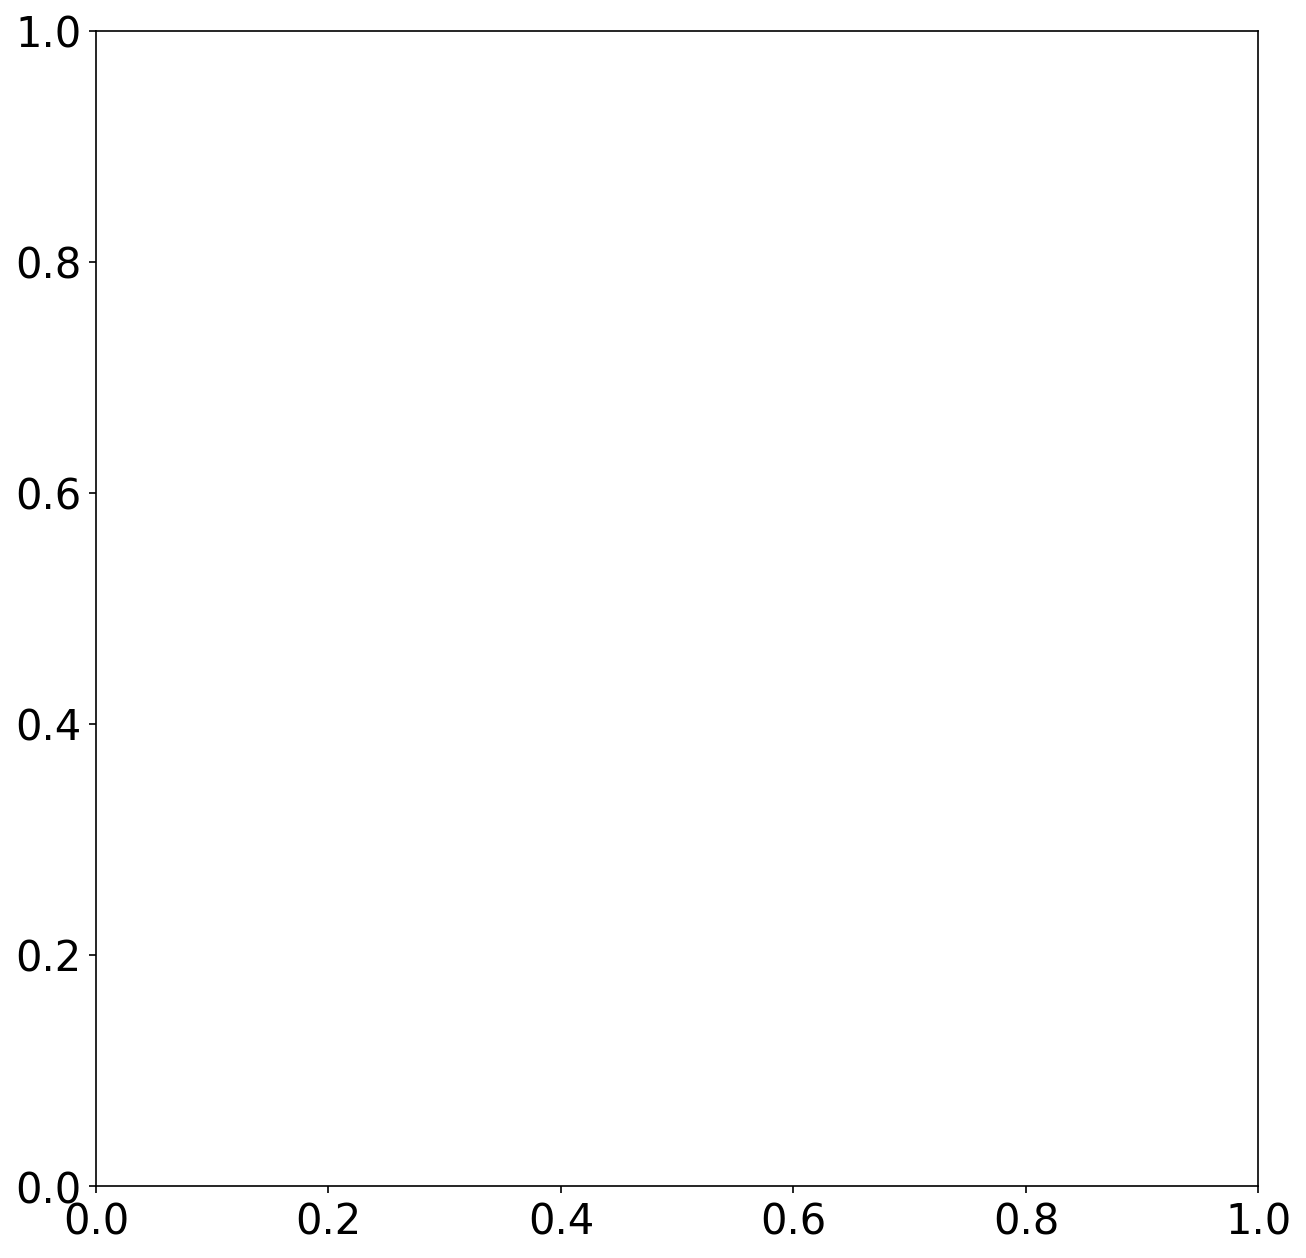

In [84]:
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)


fig, ax = plt.subplots(figsize=(10,10),dpi=150)
fig.patch.set_facecolor('white')



#Centering

ax.scatter(np.arange(0,len(s_train_Centering)), s_train_Centering,color=colors[0],s=90,marker="s",label="Training (Centering)")
ax.plot(np.arange(0,len(s_train_Centering)), s_train_Centering,color=colors[0],linewidth=3)

# ax.scatter(np.arange(0,len(s_validation)), s_validation_Centering,color=colors[0],s=90,marker="o",label="Validation (Centering)")
# ax.plot(np.arange(0,len(s_validation)), s_validation_Centering,color=colors[0],linewidth=3)


ax.scatter(np.arange(0,len(s_test_Centering)), s_test_Centering,color=colors[0],s=90,marker="*",label="Testing (Centering)")
ax.plot(np.arange(0,len(s_test_Centering)), s_test_Centering,color=colors[0],linewidth=3)

# ax.scatter(np.arange(0,len(s_all)), s_all_Centering,color=colors[0],s=90,marker="s",label="All (Centering)")
# ax.plot(np.arange(0,len(s_all)), s_all_Centering,color=colors[0],linewidth=3,linestyle='dashed')




# #NoCentering


ax.scatter(np.arange(1,len(s_train_NO_Centering)+1), s_train_NO_Centering,color=colors[1],s=90,marker="s",label="Training (NO-Centering)")
ax.plot(np.arange(1,len(s_train_NO_Centering)+1), s_train_NO_Centering,color=colors[1],linewidth=3)

# ax.scatter(np.arange(1,len(s_validation_NO_Centering)+1), s_validation_NO_Centering,color=colors[1],s=90,marker="o",label="Validation (NO-Centering)")
# ax.plot(np.arange(1,len(s_validation_NO_Centering)+1), s_validation_NO_Centering,color=colors[1],linewidth=3)


ax.scatter(np.arange(1,len(s_test_NO_Centering)+1), s_test_NO_Centering,color=colors[1],s=90,marker="*",label="Testing (NO-Centering)")
ax.plot(np.arange(1,len(s_test_NO_Centering)+1), s_test_NO_Centering,color=colors[1],linewidth=3)

# ax.scatter(np.arange(1,len(s_all_NO_Centering)+1), s_all_NO_Centering,color=colors[1],s=90,marker="s",label="All (NO-Centering)")
# ax.plot(np.arange(1,len(s_all_NO_Centering)+1), s_all_NO_Centering,color=colors[1],linewidth=3,linestyle='dashed')



ax.axhline(y=sigma_naive_test,color='k',label="Naive BMM - Test")

ax.axhline(y=sigma_naive_train,color='r',label="Naive BMM - Train")








ax.set_yscale('log')
ax.set_xlabel(r'Principal Components kept',fontsize=20)
ax.set_ylabel(r' RMSE',fontsize=20);
# ax.set_xticks([0,5,10,15])

# plt.ylim(3*10**(-3),0.7)

# plt.title("Singular values decay",fontsize=30)
plt.legend(fontsize=20)
plt.show()